# IN3063 Course work -  The Street View House Numbers (SVHN) Dataset

## Load the training and test sets

In [3]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt

# Import to a python dictionary
matTraining = scipy.io.loadmat('./train_32x32.mat')
matTest = scipy.io.loadmat('./test_32x32.mat')

X_training = matTraining.get("X")
y_training = matTraining.get("y")


X_test = matTest.get("X")
y_test = matTest.get("y")

print("Shape of X_training is: ", X_training.shape)
print("Shape of y_training is: ", y_training.shape)
print("Shape of X_test is: ", X_test.shape)
print("Shape of y_test is: ", y_test.shape)




Shape of X_training is:  (32, 32, 3, 73257)
Shape of y_training is:  (73257, 1)
Shape of X_test is:  (32, 32, 3, 26032)
Shape of y_test is:  (26032, 1)


In [4]:
y_training[:200]
y_training

array([[1],
       [9],
       [2],
       ...,
       [1],
       [6],
       [9]], dtype=uint8)

# Preprocessing
Load the dataset into X and y and check the dimensions
The X_training is having 73257 samples of images with 32x32x3 pixels.
The X_test is having 26032 samples of images with 32x32x3 pixels.
The y_training is having the shape (73257,) with values of 1-10
The y_test is having the shape (26032,) with values of 1-10


**We will preprocess these by** 
    
    1. Remove the color column with shape  (3,) 
    1.2 Convert the y values to a range of [0,8] instead of [1,9] for evaluation of the training to be easier.

    2. Reshape the Training data to (73257, 1024)
    3. Display images from training set
    4. Hot encode the y sets
    5. Visualize the y-distrubution
    6. Scale the X and y sets to have values between [0.1,0.99]

### Preprocessing 1 - drop the color column - convert y-values to [0,9]

In [5]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

##
X_training = X_training[:,:,0,:] #remove color Training
X_test = X_test[:,:,0,:] #remove color Test


y_training = y_training -1
y_test = y_test -1

### Preprocessing 2 - reshape the training sets

In [6]:
## Run only once

X_training_new = []
X_test_new = []


for i in np.arange(73257):
    reshaped = X_training[:,:,i].reshape(1024)
    X_training_new.append(reshaped)
    
for i in np.arange(26032):
    reshaped = X_test[:,:,i].reshape(1024)
    X_test_new.append(reshaped)
    
X_training = np.array(X_training_new)

X_test = np.array(X_test_new)

In [7]:
print("new shape of X_training: ", X_training.shape)
print("new shape of X_test: ", X_training.shape)


new shape of X_training:  (73257, 1024)
new shape of X_test:  (73257, 1024)


### Preprocessing 3 - Display images from training set

(73257, 1024)


<Figure size 1440x288 with 0 Axes>

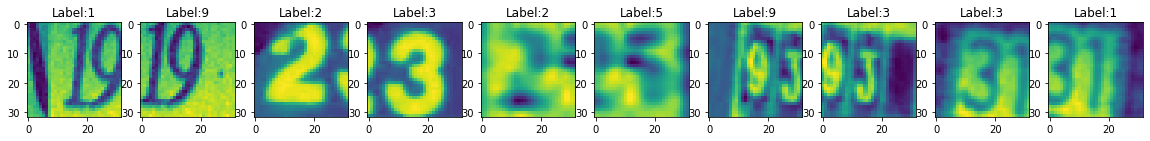

In [8]:
plt.figure(figsize=(20,4))
print(X_training.shape)
images = X_training #first 5 images in training set


fig, ax = plt.subplots(1,10, figsize=(20,10))
for i in np.arange(10):
    actual = (y_training[i,:][0]) +1
    ax[i].set_title("Label:{}".format(actual))
    #ax[i].imshow(X_training[i].reshape(32,32))
   
    ax[i].imshow(X_training[i].reshape(32,32))
plt.show()


**As seen below there is a much more complex and noisy data set than the MNIST.**

### Preprocessing 4 -  One hot encode

In [9]:
a = np.arange(0,10,1)

y_training_one_hot = (a==y_training).astype(float)
y_test_one_hot = (a==y_test).astype(float)
print("One hot encode: \n", y_training_one_hot[:10])
print("labels: \n",y_training[:10])

One hot encode: 
 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
labels: 
 [[0]
 [8]
 [1]
 [2]
 [1]
 [4]
 [8]
 [2]
 [2]
 [0]]


### Preprocessing 5 - visualize y distrubtuion
We have moved all the y values one step to the left so the real value is (+1)

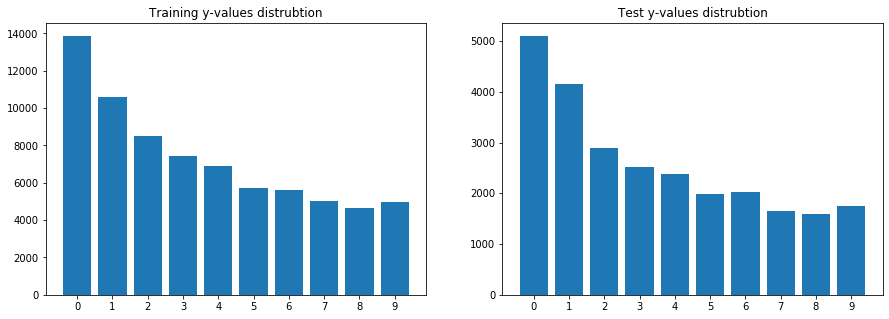

In [10]:
import numpy as np
import matplotlib.pyplot as plt

valuesTraining, countsTraining = np.unique(y_training, return_counts=True)
valuesTest, countsTest = np.unique(y_test, return_counts=True)


fig, ax=plt.subplots(1,2, figsize=(15,5))

ax[0].set_title("Training y-values distrubtion")
ax[0].bar(valuesTraining, countsTraining)
ax[0].set_xticks(valuesTraining)


ax[1].set_title("Test y-values distrubtion")
ax[1].bar(valuesTest, countsTest)
ax[1].set_xticks(valuesTest)

plt.show()


## Rescale X
We scale the features to a values betweeen [0.01, 0.99] because if an activation is 0 and the derivative of the cost with respect to a weight is dependent on the activation the gradient will prevent a weight update. We are describing the back-propogation in later section, where we see why it is like that.

In [11]:
np.unique(X_training, return_counts=True)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

In [12]:
fac = 0.98 / 255
add_fac = 0.01
X_training_scaled =  np.asfarray(X_training) * fac + add_fac
X_test_scaled =  np.asfarray(X_test) *fac + add_fac


print("max:", np.max(X_training_scaled))
print("minimum: ", np.min(X_training_scaled))



max: 0.99
minimum:  0.01


## Rescale y one hot to 0.01 and 0.99
we are saving the unscaled version

In [13]:
y_training_one_hot_unscaled = y_training_one_hot.copy()
y_test_one_hot_unscaled = y_test_one_hot.copy()



y_training_one_hot[y_training_one_hot==0] = 0.01
y_training_one_hot[y_training_one_hot==1] = 0.99
y_test_one_hot[y_test_one_hot==0] = 0.01
y_test_one_hot[y_test_one_hot==1] = 0.99

In [14]:
print(y_training_one_hot[:5])
print(y_training[:5])

[[0.99 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.99 0.01]
 [0.01 0.99 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.99 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.99 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]]
[[0]
 [8]
 [1]
 [2]
 [1]]


************
## Task 1: Implementing linear and ReLu layers
forward and backward passess for linear layers and ReLU activation

### Defining activation functions linear, sigmoid and ReLU

## Linear

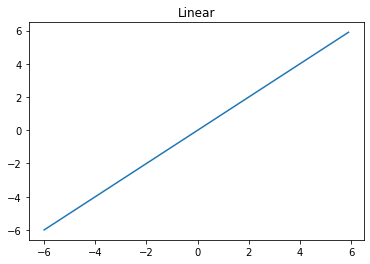

In [15]:
testInput = np.arange(-6,6,0.1)
@np.vectorize
def linear(x):
    return x

plt.title("Linear")
plt.plot(testInput, linear(testInput))
    

## Sigmoid

$$ \frac {1} {1+e^-x}$$

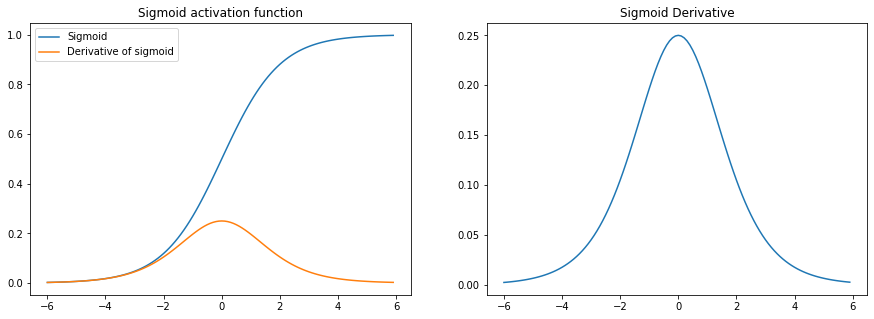

In [16]:
@np.vectorize
def sigmoid(x):
    x = np.array(x)
    return 1 / (1+ np.e ** -x)

@np.vectorize
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

fig,ax  = plt.subplots(1,2,figsize=(15,5))
ax[0].set_title("Sigmoid activation function")
ax[0].plot(testInput, sigmoid(testInput))
ax[0].plot(testInput, sigmoid_derivative(testInput))
ax[0].legend(["Sigmoid", "Derivative of sigmoid"])

ax[1].set_title("Sigmoid Derivative")
ax[1].plot(testInput, sigmoid_derivative(testInput))



## Relu

$$ $$

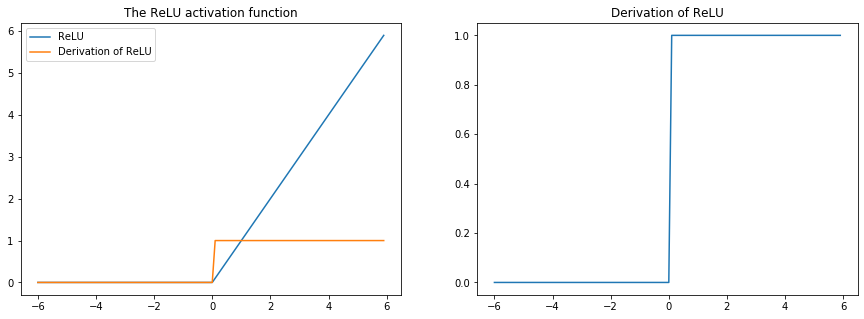

In [17]:
@np.vectorize
def ReLU(x):
    return np.maximum(0.0, x )

@np.vectorize
def ReLU_derivative(x):
    if x <= 0:
        return 0
    else:
        return 1

fig,ax  = plt.subplots(1,2,figsize=(15,5))
ax[0].set_title("The ReLU activation function")
ax[0].plot(testInput, ReLU(testInput))
ax[0].plot(testInput, ReLU_derivative(testInput))
ax[0].legend(["ReLU", "Derivation of ReLU"])


ax[1].set_title("Derivation of ReLU")
ax[1].plot(testInput, ReLU_derivative(testInput))

****

### Defining a simple Neural Network

  #### We define a simple ANN with 
      1. one input layer with 32 x 32 nodes as it is the image size.
      2. one hidden layer with 16 nodes
      3. one output layer with 10 nodes (one for each number (label))
     
  #### We initlize the weights to a random value between 0 and 1 (We will optimize this initliation in later stages)
  ### Terminology of  variable names in the network
      
      a = (vectorized) activations
      z = (vectorized) the intermediate output when weights are added with activations
      
  
  

In [18]:
class NeuralNetwork(object):
    def __init__(self):
        self.inputLayerSize = 1024
        self.hiddenLayerSize = 16
        self.outputLayerSize = 10
        self.initilize_weights()
    
    def summary(self):
        print("Input layer size : " + str(self.inputLayerSize) + "\n")
        print("Hidden layer size : " +str(self.hiddenLayerSize) + "\n")
        print("Output layer size : " + str(self.outputLayerSize) + "\n")
        
        ##Parameters
        parametersInFirstLayer = np.multiply(self.W1.shape[0], self.W1.shape[1])
        parametersInHiddenLayer = np.multiply(self.W2.shape[0], self.W2.shape[1])
        print("Parameters to train in W1: " + str(parametersInFirstLayer) +"\n")
        print("Parameters to train in W2: " + str(parametersInHiddenLayer) +"\n")

        print("Total parameters: ", str(parametersInFirstLayer + parametersInHiddenLayer))
    
         
    def initilize_weights(self):
        self.W1 = np.random.rand(self.inputLayerSize, self.hiddenLayerSize) # (1024x16) !16384 parameters! weights from input nodes to hidden layer (1024x16)
        self.W2 = np.random.rand(self.hiddenLayerSize, self.outputLayerSize) #(16x2) 32parameters weights from hidden layers to output
    
    
    def feedForward(self, x):
        #propogate inputs through network
        # x is input into network = a0
        #return the activation of the last layers = probabilities of the classes
        
        
        self.z1 = np.dot(x, self.W1)
        self.a1 = sigmoid(self.z1) #sigmoid activation function
        
        self.z2 = np.dot(self.a1, self.W2)
        self.a2 = sigmoid(self.z2)
        
        return self.a2
        
        
    def backward():
        None
    
    def costFunction():
        None
        
            
    def train():
        None
        

In [19]:
NN = NeuralNetwork()
NN.summary()


Input layer size : 1024

Hidden layer size : 16

Output layer size : 10

Parameters to train in W1: 16384

Parameters to train in W2: 160

Total parameters:  16544


## Feedforward

In [20]:
for i in range(5):
    
    output = NN.feedForward(X_training_scaled[i])
    print("Labels: ", y_training[i])
    print(output , "\n\n")

Labels:  [0]
[0.99982468 0.99940693 0.99988305 0.99961411 0.99964417 0.99974582
 0.9995916  0.99933666 0.99975547 0.99541231] 


Labels:  [8]
[0.99982468 0.99940693 0.99988305 0.99961411 0.99964417 0.99974582
 0.9995916  0.99933666 0.99975547 0.99541231] 


Labels:  [1]
[0.99982468 0.99940693 0.99988305 0.99961411 0.99964417 0.99974582
 0.9995916  0.99933666 0.99975547 0.99541231] 


Labels:  [2]
[0.99982468 0.99940693 0.99988305 0.99961411 0.99964417 0.99974582
 0.9995916  0.99933666 0.99975547 0.99541231] 


Labels:  [1]
[0.99982468 0.99940693 0.99988305 0.99961411 0.99964417 0.99974582
 0.9995916  0.99933666 0.99975547 0.99541231] 




#### Before we train the network with sigmoid activation function it is good the get better initlization
##### As almost all values are close to 1 the sigmoids vanishing gradient will make it hard (or very slow) to train.

## Weight initilization

It is a good idea to initlize our weight in a better way than we've done so far.
The initila initlization used in the forward pass was random values between 0 and 1.

A good idea for sigmoid is to intilize the values within the range:

$$ \frac {-1}{\sqrt n} , \frac {1}{\sqrt n}$$

The weights should be over the normal distrubution and we use the defined helper function from tutorial 4 to get that.

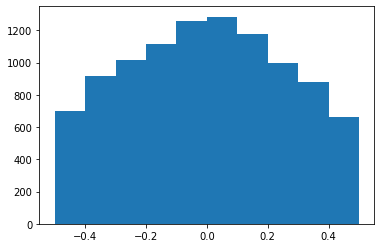

In [21]:
from scipy.stats import truncnorm

def truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)
X = truncated_normal(mean=0, sd=0.4, low=-0.5, upp=0.5)
s = X.rvs(10000)
plt.hist(s)
plt.show()

## Weights better distributed

In [22]:
class NeuralNetwork(object):
    def __init__(self):
        self.inputLayerSize = 1024
        self.hiddenLayerSize = 16
        self.outputLayerSize = 10
        self.initilize_weights()
    
    def summary(self):
        print("Input layer size : " + str(self.inputLayerSize) + "\n")
        print("Hidden layer size : " +str(self.hiddenLayerSize) + "\n")
        print("Output layer size : " + str(self.outputLayerSize) + "\n")
        
        ##Parameters
        parametersInFirstLayer = np.multiply(self.W1.shape[0], self.W1.shape[1])
        parametersInHiddenLayer = np.multiply(self.W2.shape[0], self.W2.shape[1])
        print("Parameters to train in W1: " + str(parametersInFirstLayer) +"\n")
        print("Parameters to train in W2: " + str(parametersInHiddenLayer) +"\n")

        print("Total parameters: ", str(parametersInFirstLayer + parametersInHiddenLayer))
    
         
    def initilize_weights(self):
        #self.W1 = np.random.rand(self.inputLayerSize, self.hiddenLayerSize) # (1024x16) !16384 parameters! weights from input nodes to hidden layer (1024x16)
        #self.W2 = np.random.rand(self.hiddenLayerSize, self.outputLayerSize) #(16x2) 32parameters weights from hidden layers to output
    
        rangeW1 = 1 / np.sqrt(self.inputLayerSize) #Get the range to be as defined above 
        distrubutionW1 = truncated_normal(mean=0,sd=1, low=-rangeW1, upp=rangeW1) # Create a normal distrubtion trunctaed within the range
        self.W1 = distrubutionW1.rvs((self.inputLayerSize,self.hiddenLayerSize)) #Randomly distribute the normal distrubtion with correct dimensions 
        
        rangeW2 = 1 / np.sqrt(self.hiddenLayerSize)
        distrubutionW2 = truncated_normal(mean=0, sd=1, low=-rangeW2, upp=rangeW2)
        self.W2 = distrubutionW2.rvs((self.hiddenLayerSize, self.outputLayerSize))
    
    
    def feedForward(self, x):
        #propogate inputs through network
        # x is input into network = a0
        #return the activation of the last layers = probabilities of the classes
        
        
        self.z1 = np.dot(x, self.W1)
        self.a1 = sigmoid(self.z1) #sigmoid activation function
        
        self.z2 = np.dot(self.a1, self.W2)
        self.a2 = sigmoid(self.z2)
        
        return self.a2
        
        
    def backward():
        None
    
    def costFunction():
        None
        
            
    def train():
        None
        

## Feedforward

In [23]:
NN = NeuralNetwork()
for i in np.arange(5):
    print("Label:", y_training[i])
    print(NN.feedForward(X_training_scaled[i]))

Label: [0]
[0.61203287 0.64257953 0.53393847 0.54966332 0.54207879 0.53887957
 0.55231639 0.5432149  0.64110247 0.44149603]
Label: [8]
[0.61523972 0.64043963 0.53363865 0.54420737 0.5418447  0.53840078
 0.55548714 0.54120562 0.63819848 0.44306874]
Label: [1]
[0.61491502 0.63959372 0.52890024 0.53826784 0.53804181 0.54698187
 0.5459276  0.54472392 0.65278513 0.43590236]
Label: [2]
[0.61443661 0.64345606 0.52576082 0.5426554  0.54109742 0.54398686
 0.54156497 0.55104049 0.64886752 0.44749211]
Label: [1]
[0.60959294 0.64139381 0.53209468 0.543189   0.53983279 0.54135677
 0.54685133 0.54377048 0.6454084  0.43970828]


### The better range of weights values made the output of the network more suitable for training as it outputed an average of 50% for each label. As we are using sigmoid which is subject to vanishing gradients, it is desireable.


***
## Backpropogate

    A network is not useful if it is not trained to generelize (predict label of unseen data). In order to train the model we need to implement backprogation. We will improve our model in a few step in order to train the model.
    
    1. Add biases to increase the flexibillity of the network in training. 
    2. Implement cost function and the derivative of the cost function
    3. Implement backpropogation as a class method (backwards) that returns the partial derivatives of the cost functions to the weight matrix.
    4. Set learning rate
    5. Update the weight matrix in opposite direction of the partial derivatives of the weight matrix.
    6. Implement performance metrics to be used when analysing different network architectures and hyper-parameters.

### 1. Add bias

The feedforward method in our network right now is defined by taking the weighted sum and feed into the activation function sigmoid. That is delta = activation function:
 $$\delta\big(w_{1}x_{1}+w_{2}x_{2}+..+w_{i}x_{i}\big) $$ 
 
When adding the bias to each neuron the neuron gets a broader range of when it can be active. An important aspect when implementing the ReLU, that is always returing 0 if weighted sum is 0 or less.

$$\delta\big(w_{1}x_{1}+w_{2}x_{2}+..+w_{i}x_{i} + b\big) $$ 

### 2. Cost function Mean Squared Error
In order to get use backprogation we need a cost function that we can take the derivative of to get the partial derivative of the cost function in respect to the weight vectors. 


### We define a cost function of squared error


(-0.0001, 0.0005)

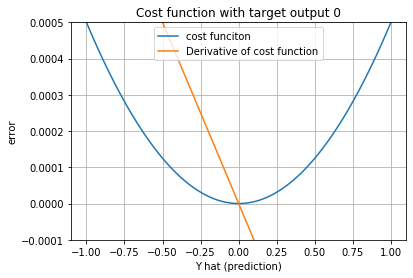

In [24]:
def cost(output, target, derivative=False):
    output = np.array(output,dtype=float)
    target = np.array(target, dtype=float)

    if derivative:
        return 2 * (target-output) / len(target)
    return ((target - output) ** 2) / len(target)
    

j = np.arange(-1,1,0.001)
#print(j)
testO, testT = [-10,-7,-5,-2.5,-0.5,0.5, 2.5,5,7,10],[0,0,0,0,0,0,0,0,0,0]
plt.plot(j, cost(j, np.zeros(len(j))))
plt.grid()


plt.plot(j,cost(j, np.zeros(len(j)), derivative=True))
plt.legend(["cost funciton", "Derivative of cost function"])

plt.title("Cost function with target output 0")
plt.xlabel("Y hat (prediction)")
plt.ylabel("error")
plt.ylim(-0.0001,0.0005)


### 3. Implementing the back propogation

For backpropogation we need to find the relative increase in the cost function with respect to an increase of the weights. Therefore we need to find the derivative of the cost function w.r.t. the weights. 


#### Chain rule
As seen before the Cost function is the outer function which have several nested inner functions. In order to find: 

$$\frac{\partial C}{ \partial W}$$


We can apply the chain rule which says that the rate of change of a function of a function is the multiple of the derivatives of those functions:

$$\frac{\partial}{ \partial x}f \big( g(x) \big) = g'(x) * f'(x)$$


And as the cost function, w.r.t. the weights, is the composition of the functions of the layers. Therefore the chain rule can be applied to find the derivative of the Cost function w.r.t. the weights.



$$\frac{\partial}{ \partial x}f \big( g \big( h \big(i(j(x))\big)\big) \big) = \frac{\partial j}{ \partial x}\frac{\partial i}{ \partial j}\frac{\partial h}{ \partial i}\frac{\partial g}{ \partial f}\frac{\partial f}{ \partial g}$$

***
##  We use the chain rule to derive the change for the W2 (weight tensor between hidden layer and output)

***The cost function (mean squared error) is a function of y hat (output of the network)***

$$C(\hat y)=\big(\hat y-y \big) ^2 $$


***y hat is a function of the z2 layer (fed into sigmoid in our case)***

$$ \hat y(z2)=\frac {1}{1+e^-z2} $$



***z2 is a function of w (it is the weighted sum with the activation of the hidden layer a2)***

$$z2(W2)=\big(a2 * W2 \big) $$


#### When applying the chain rule we get ####
$$\frac{\partial C}{ \partial W2} = \frac{\partial z2}{ \partial W2}\frac{\partial \hat y}{ \partial z2} \frac{\partial C}{ \partial \hat y}$$




### Note! this is only for the last weight matrix and bias and regularization is not in the derivation




### Sigmoid activation function and Squared Error used for backpropogation for W1

To get the $\frac{\partial C}{ \partial W1} $ we can reuse the beginning of the function defined above. The $\frac{\partial \hat y}{ \partial z2} *\frac{\partial C}{ \partial \hat y}$ usualy is denoted as $\delta 2$. To derive $\frac{\partial C}{ \partial W1}$ we get the following defintion: 

$$\delta 2 * \frac{\partial z_{2}}{ \partial a_{2}} \frac{\partial a_{2}}{ \partial z_{1}}\frac{\partial z_{1}}{ \partial W_{1}} $$


where: $ \frac{\partial a_{2}}{ \partial z_{1}} $ is the partial derivative of the activation of neurons in the hidden layer to the weighted sum feed into the activation function. i.e. the derivative of the activation function of the hidden layer w.r.t. the input. First we implement the sigmoid as the hidden layer activation function but then ReLU. Therefore we implemented the derivative of the ReLU above also.

***

### 4, 5. Set learning rate and update weight matrices

When we get partial derivative of the cost function to the different weight matrices we know in what direction every specific weight needs to go in order to increase the cost. As we want to decrease the cost we update the weights by subtracting the $\frac{\partial C}{\partial W} * scalar$. The scalar is called the learning rate as it determines how big steps we are taking towards the minimum of the function. If the steps are to big we will always overshoot the minimum and if the steps are too small we will never reach the minimum in a reasonable amount of computation time. 

****

### 6. Evaluation metrics for out multiclass problem

When picking performance metrics it is important to contemplate over the exact problem we are aiming to solve. Different preformance metrics could be relativley important.

##### We will use accuracy, precision, recall as performance metrics. We will also use a confusion matrix to visualize the relative predictions/actual distrubtion. #####

### Accuracy

The accuracy is the total correct predictions / all predicitons made. It will tell us the overall performance of the model. However by adding precision and recall we can get more information on how the model is peforming

****

In multiclass problems the precision can be derived for each label. The precision is calculated where
**i=column and j=row:**

### Precision

$$ precision_{i}  = \frac {M_{ii}}{\sum_{j} M_{ji}} $$

**As the predictions of the confusion matrix is the columns the precision telling us: out of all predictions made of one class, how many was correct**

****

### Recall

The recall on the other hand is dividing a correct predictions with the corresponding row for the label. i.e. the sum of all actual labels. The recall will then tell us out of all the outstanding instances of one label, how many of those could the model identify.

$$ recall_{i}  = \frac {M_{ii}}{\sum_{j} M_{ij}} $$




***
## Backpropogate
Let us implement all the above in order to train our Neural Network

In [25]:
class NeuralNetwork(object):
    def __init__(self):
        self.inputLayerSize = 1024
        self.hiddenLayerSize = 16
        self.outputLayerSize = 10
        self.learningRate = 0.01
        self.bias = True
        self.initilize_weights()
        
    
    def summary(self):
        print("Input layer size : " + str(self.inputLayerSize) + "\n")
        print("Hidden layer size : " +str(self.hiddenLayerSize) + "\n")
        print("Output layer size : " + str(self.outputLayerSize) + "\n")
        
        ##Parameters
        parametersInFirstLayer = np.multiply(self.W1.shape[0], self.W1.shape[1])
        parametersInHiddenLayer = np.multiply(self.W2.shape[0], self.W2.shape[1])
        print("Parameters to train in W1: " + str(parametersInFirstLayer) +"\n")
        print("Parameters to train in W2: " + str(parametersInHiddenLayer) +"\n")

        print("Total parameters: ", str(parametersInFirstLayer + parametersInHiddenLayer))
    
           
    def initilize_weights(self):
        #self.W1 = np.random.rand(self.inputLayerSize, self.hiddenLayerSize) # (1024x16) !16384 parameters! weights from input nodes to hidden layer (1024x16)
        #self.W2 = np.random.rand(self.hiddenLayerSize, self.outputLayerSize) #(16x2) 32parameters weights from hidden layers to output
        
        bias_node = 1 if self.bias else 0 # default self.bias is true
       
        rangeW1 = 1 / np.sqrt(self.inputLayerSize+bias_node) #Get the range to be as defined above 
        distrubutionW1 = truncated_normal(mean=0,sd=1, low=-rangeW1, upp=rangeW1) # Create a normal distrubtion trunctaed within the range
        self.W1 = distrubutionW1.rvs((self.inputLayerSize+bias_node,self.hiddenLayerSize,)) #Randomly distribute the normal distrubtion with correct dimensions 
        
        rangeW2 = 1 / np.sqrt(self.hiddenLayerSize)
        distrubutionW2 = truncated_normal(mean=0, sd=1, low=-rangeW2, upp=rangeW2)
        self.W2 = distrubutionW2.rvs(( self.hiddenLayerSize+bias_node,self.outputLayerSize))
    
    def feedForward(self, x):       
       
   
            x = np.array(x, ndmin=2) # every row is an input

            if self.bias:
                biases = np.ones(len(x))
                x = np.c_[x, biases]  ##adding bias to the input layer # bias is an extra one

    


            self.z1 = np.dot(x, self.W1)

            if self.bias:
                biases = np.ones(len(self.z1))
                self.z1 = np.c_[self.z1, biases]  ##Adding the bias to the hidden layer

            self.a1 = sigmoid(self.z1) #sigmoid activation function


            self.z2 = np.dot(self.a1, self.W2)
            self.a2 = sigmoid(self.z2)

            return self.a2
        
     
    ##This is the implementatiion of the back-propogation
    def backward(self, iput, output, target):
        
        #Calculate dcdw2 - how much the an arbritary change for each weiight in the W1 matrix affect the cost
        dcdy = self.MSE_prime(output, target) #partial derivative of error w.r.t. y hat (prediction)
        #print("shape pof dcdy", dcdy.shape)
        dyDz2 = sigmoid_derivative(self.z2) #Patial derivative of yhat with respect to z2,
        #print("shape of dydz2", dyDz2.shape)
        delta2 = dcdy * dyDz2
        
       # print("shape of delta 2", delta2.shape)
        
        
        dz2dw2 = self.a1.T # partial derivative of z2 with respect to weights
        
        dcdw2 = np.dot( dz2dw2, delta2) # chain rule applied to get derivative of the cost w.r.t. the weights
       # print(dcdw2.shape)
      
        ##Calculate dcdw1 - how much the an arbritary change for each weiight in the W2 matrix affect the cost
        
        dz2da1 =  self.W2.T  # Equals to the weight # Hidden errors
       
        dcda1 = np.dot(delta2, dz2da1 )
        #print("shape",dcda1.shape)
        da1dz1 = sigmoid_derivative(self.z1) #the derivative of the activation function for a1 - hidden layer
      
        
        
        delta1 = dcda1 * da1dz1
        
        iput = np.array(iput, ndmin=2) # every row is an input

        if self.bias:
            biases = np.ones(len(iput))
            iput = np.c_[iput, biases]  ##adding bias to the input layer
            
            
        dz1dw1 = iput.T # The matrix product for input and weights - partial derivative of the product mutliplication w.r.t. the weights is simply the input then.
       
        dcdw1 = np.dot(dz1dw1, delta1)
     
        #print(dcdw1.shape)
     
        
        return dcdw1, dcdw2


    def MSE(self,yHat, y): ##Cost function Mean squared error
        return np.sum((yHat - y)**2) / y.size
    
    def MSE_prime(self,yHat, y): # Derivative of the cost fucnction
        return yHat - y
    
    
    def train(self, training, target):
        
        network_output= self.feedForward(training)
    
        dcdw1, dcdw2 = self.backward(training, network_output,  target)
    
        ##Update weights
        if self.bias:
             self.W1 = self.W1 - (self.learningRate * dcdw1[:,:-1])
        else:
            self.W1 = self.W1 - (self.learningRate * dcdw1) 
        
        self.W2 = self.W2 - (self.learningRate * dcdw2)
        
        return network_output, target

        
    
  
    ###Evaluations
    
    def evaluate(self, actual, predicted):
        corrects, wrongs = 0, 0
        corrects = len(actual[actual == predicted])
        wrongs = len(actual[actual != predicted])
        
        return corrects, wrongs
    
    
    def acc(self,actual, predicted):
        correct, wrongs = self.evaluate(actual, predicted)
        
        return correct / (correct + wrongs)
    
    def confusion_matrix(self, actual, predicted):
        length = len(np.unique(actual))
        width = length
        print(length)
        cm = np.zeros((width, length))
        
        for i in range(len(actual)):
            cm[actual[i],predicted[i]] += 1
        print(cm)
        return cm
          
    def precision(self, label, confusion_matrix): 
        col = confusion_matrix[:, label]
        return confusion_matrix[label, label] / col.sum()
    
    def recall(self, label, confusion_matrix):
        row = confusion_matrix[label, :]
        return confusion_matrix[label, label] / row.sum()
        
        
        
        

In [26]:
NN = NeuralNetwork()
NN.summary()

Input layer size : 1024

Hidden layer size : 16

Output layer size : 10

Parameters to train in W1: 16400

Parameters to train in W2: 170

Total parameters:  16570


We have **16544** paramters to train and we have **73257 sample.** We have constructed the network so it is possible to feed in batches. It is possible because we take the dot product of the inputs to the weights. Every row will then become one sample. As seen when we make a single feedforward here on the 100 first samples in the training set.

In [30]:
NN = NeuralNetwork()
len(X_training_scaled)
NN.feedForward(X_training_scaled[:100])

array([[0.2935801 , 0.53181805, 0.56616242, 0.47996289, 0.46616009,
        0.49446518, 0.51902744, 0.4075332 , 0.39451713, 0.53753475],
       [0.29428719, 0.53195456, 0.56172436, 0.48247316, 0.46564794,
        0.49432539, 0.51770928, 0.4078723 , 0.39845368, 0.53950564],
       [0.29650362, 0.53834391, 0.56470179, 0.47724194, 0.45857032,
        0.48999881, 0.51908384, 0.40301354, 0.40520054, 0.54989863],
       [0.2929441 , 0.54213087, 0.55797135, 0.47592701, 0.45092797,
        0.49360785, 0.52138971, 0.39173288, 0.39866074, 0.55695546],
       [0.2977541 , 0.53415027, 0.56319634, 0.47873243, 0.461921  ,
        0.49387453, 0.51941189, 0.40488977, 0.39826737, 0.54441349],
       [0.29609571, 0.53403345, 0.56322704, 0.4809644 , 0.46217962,
        0.49353208, 0.5182807 , 0.40692669, 0.39832772, 0.54235605],
       [0.2980639 , 0.5339024 , 0.56241743, 0.47648037, 0.46179774,
        0.49201119, 0.52079336, 0.40310416, 0.40204746, 0.54345106],
       [0.29928037, 0.53233322, 0.5632799

### Now it is time to train the network for the first time with sigmoid activation in both the hidden and the last activation layer. Since samples (73275) * trainable parameters(16544) = 1.212.201.600, one single epoch will need a lot of computations. We do not choose to feed in the whole network in case of stack overflow, as we need to save a lot of data, i.e. in the weight matrices. We start by feeding into online feeding and saving the loss and accuracy every 1000th sample. The online method is updating the weight for every single sample and therefore a constant O(n) is added to the complexity.

In [26]:
loss = []
#
count = 1
acc = []
for i in range(29):
    print("*", end="")
    for i in np.arange(1,(len(X_training_scaled)),1):    
        output, target = NN.train(X_training_scaled[i][:, np.newaxis].T, y_training_one_hot[i])
        if( i % 1000 == 0):
            print("#", end="")
            loss.append(NN.MSE(output,target))
            pred = NN.feedForward(X_training_scaled) #Get predictions
            pred = [np.argmax(x) for x in pred] #Get the value that the network has put the highst possibility on
            pred = np.array(pred)
            acc.append(NN.acc(y_training.flatten(), pred))
      

*#########################################################################*#########################################################################*#########################################################################*#########################################################################*#########################################################################*#########################################################################*#########################################################################*#########################################################################*#########################################################################*#########################################################################*#########################################################################*#########################################################################*#########################################################################*#####################################

### Save trained model to binary with the weights with Pickle
As the online training takes such a long time it is a good idea to save the trained network, with the modified weights, if we wanted to make predictions from it later or futher the analysis.

In [27]:
import os
import pickle
with open(os.path.join(".","neural_network_basic_W1.pkl"), "bw") as fh:
    data = (NN.W1)
    pickle.dump(data, fh)
with open(os.path.join(".","neural_network_basic_W2.pkl"), "bw") as fh:
    data = (NN.W2)
    pickle.dump(data, fh)
with open(os.path.join(".","loss-basic_neural_network.pkl"), "bw") as fh:
    data = (loss)
    pickle.dump(data, fh)
with open(os.path.join(".","acc-basic_neural_network.pkl"), "bw") as fh:
    data = (acc)
    pickle.dump(data, fh)



### Evaluate the model

10
[[1.024e+04 7.320e+02 7.350e+02 4.970e+02 1.447e+03 5.800e+01 8.100e+01
  1.700e+01 3.600e+01 1.800e+01]
 [4.900e+02 8.311e+03 5.170e+02 2.530e+02 7.490e+02 7.000e+01 8.900e+01
  2.700e+01 6.300e+01 1.600e+01]
 [6.960e+02 1.088e+03 2.936e+03 2.020e+02 3.242e+03 1.420e+02 1.020e+02
  4.400e+01 2.700e+01 1.800e+01]
 [4.300e+02 3.580e+02 2.550e+02 5.600e+03 6.070e+02 1.250e+02 1.900e+01
  2.600e+01 3.000e+01 8.000e+00]
 [3.590e+02 3.500e+02 9.560e+02 2.080e+02 4.785e+03 1.060e+02 4.400e+01
  3.100e+01 3.300e+01 1.000e+01]
 [3.290e+02 3.230e+02 5.340e+02 5.990e+02 2.316e+03 1.446e+03 5.400e+01
  8.400e+01 1.200e+01 3.000e+01]
 [6.480e+02 1.979e+03 4.350e+02 1.100e+02 7.330e+02 1.110e+02 1.532e+03
  1.600e+01 2.600e+01 5.000e+00]
 [3.180e+02 3.810e+02 6.340e+02 2.670e+02 2.294e+03 1.510e+02 2.900e+01
  8.770e+02 3.700e+01 5.700e+01]
 [3.850e+02 4.480e+02 7.420e+02 1.730e+02 1.736e+03 3.200e+01 2.800e+01
  1.000e+01 1.009e+03 9.600e+01]
 [4.170e+02 4.800e+02 6.970e+02 1.900e+02 1.836e+03 

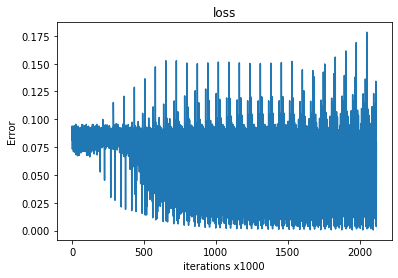

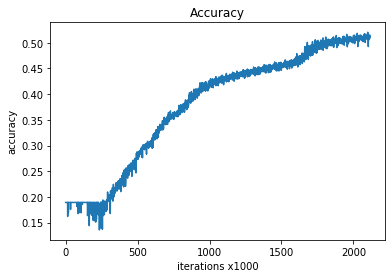

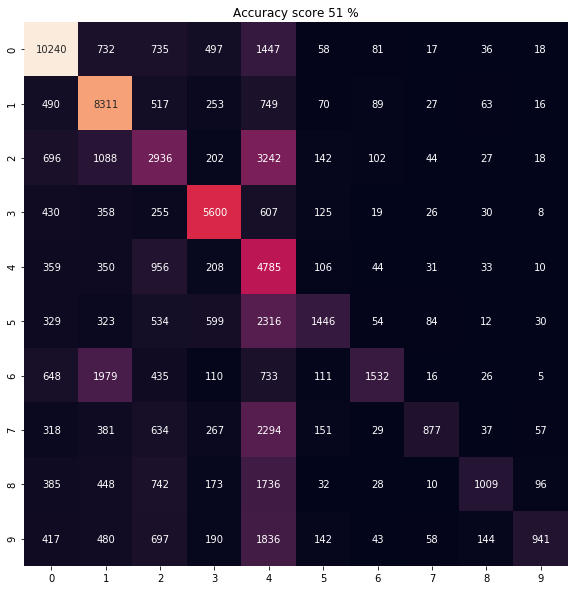

In [28]:
plt.title("loss")
plt.ylabel("Error")
plt.xlabel("iterations x1000")
plt.plot(loss)
plt.figure()
plt.title("Accuracy")
plt.xlabel("iterations x1000")
plt.ylabel("accuracy")
plt.plot(acc)


import seaborn as sns

##Accuracy score
accuracy = NN.acc(y_training.flatten(), pred)


plt.figure(figsize=(10,10))
ax = plt.subplot()
## Confusion matrix
cm = NN.confusion_matrix(y_training, pred)
ax.set_ylabel("Actual label")
ax.set_xlabel("Predicted value")
ax.set_title("Accuracy score {} %".format(round(accuracy*100),2))

ax = sns.heatmap(cm, annot=True, square=True, cbar=False, fmt='g')
ax.set_ylim(10,0) #maked heatmap showiung all squares

for i in np.arange(len(np.unique(y_training))):
    print("Precision for label {} is {}".format(i, round(NN.precision(i, cm),2)))
    print("Recall for label {} is {}".format(i, round(NN.recall(i, cm),2)))

## ReLU implementation in hidden layer

We change the weight intilization for the hidden layer because it is suggested to have the weights within the range below when using ReLU:

$$ \frac {-2}{\sqrt n} , \frac {2}{\sqrt n}$$


In [27]:
@np.vectorize
def ReLU(x):
    return np.maximum(0.0, x)
#derivation
@np.vectorize
def ReLU_derivation(x):
    if x <= 0:
        return 0
    else:
        return 1

In [28]:
class NeuralNetwork_relu(object):
    
    def __init__(self, bias, input_layer, hidden_layer, output_layer, learning_rate):
        self.inputLayerSize = input_layer
        self.hiddenLayerSize = hidden_layer
        self.outputLayerSize = output_layer
        self.learningRate = learning_rate
        self.bias = bias       
        self.initilize_weights()
        
    def summary(self):
        print("Input layer size : " + str(self.inputLayerSize) + "\n")
        print("Hidden layer size : " +str(self.hiddenLayerSize) + "\n")
        print("Output layer size : " + str(self.outputLayerSize) + "\n")
        
        ##Parameters
        parametersInFirstLayer = np.multiply(self.W1.shape[0], self.W1.shape[1])
        parametersInHiddenLayer = np.multiply(self.W2.shape[0], self.W2.shape[1])
        print("Parameters to train in W1: " + str(parametersInFirstLayer) +"\n")
        print("Parameters to train in W2: " + str(parametersInHiddenLayer) +"\n")

        print("Total parameters: ", str(parametersInFirstLayer + parametersInHiddenLayer))
    
           
    def initilize_weights(self):
        #self.W1 = np.random.rand(self.inputLayerSize, self.hiddenLayerSize) # (1024x16) !16384 parameters! weights from input nodes to hidden layer (1024x16)
        #self.W2 = np.random.rand(self.hiddenLayerSize, self.outputLayerSize) #(16x2) 32parameters weights from hidden layers to output
        
        bias_node = 1 if self.bias else 0 # default self.bias is true
       
        rangeW1 = 2 / np.sqrt(self.inputLayerSize+bias_node) #Get the range to be as defined above 
        distrubutionW1 = truncated_normal(mean=0,sd=1, low=-rangeW1, upp=rangeW1) # Create a normal distrubtion trunctaed within the range
        self.W1 = distrubutionW1.rvs((self.inputLayerSize+bias_node,self.hiddenLayerSize,)) #Randomly distribute the normal distrubtion with correct dimensions 
        
        rangeW2 = 1 / np.sqrt(self.hiddenLayerSize)
        distrubutionW2 = truncated_normal(mean=0, sd=1, low=-rangeW2, upp=rangeW2)
        self.W2 = distrubutionW2.rvs(( self.hiddenLayerSize+bias_node,self.outputLayerSize))
    
    def feedForward(self, x):       
       
   
            x = np.array(x, ndmin=2) # every row is an input

            if self.bias:
                biases = np.ones(len(x))
                x = np.c_[x, biases]  ##adding bias to the input layer # bias is an extra one

    


            self.z1 = np.dot(x, self.W1)

            if self.bias:
                biases = np.ones(len(self.z1))
                self.z1 = np.c_[self.z1, biases]  ##Adding the bias to the hidden layer

            self.a1 = ReLU(self.z1) #Relu activation function


            self.z2 = np.dot(self.a1, self.W2)
            self.a2 = sigmoid(self.z2)

            return self.a2
        
     
    ##This is the implementatiion of the back-propogation
    def backward(self, iput, output, target):
        
        #Calculate dcdw2 - how much the an arbritary change for each weiight in the W1 matrix affect the cost
        dcdy = self.MSE_prime(output, target) #partial derivative of error w.r.t. y hat (prediction)
        #print("shape pof dcdy", dcdy.shape)
        dyDz2 = sigmoid_derivative(self.z2) #Patial derivative of yhat with respect to z2,
        #print("shape of dydz2", dyDz2.shape)
        delta2 = dcdy * dyDz2
        
       # print("shape of delta 2", delta2.shape)
        
        
        dz2dw2 = self.a1.T # partial derivative of z2 with respect to weights
        
        dcdw2 = np.dot( dz2dw2, delta2) # chain rule applied to get derivative of the cost w.r.t. the weights
       # print(dcdw2.shape)
      
        ##Calculate dcdw1 - how much the an arbritary change for each weiight in the W2 matrix affect the cost
        
        dz2da1 =  self.W2.T  # Equals to the weight # Hidden errors
       
        dcda1 = np.dot(delta2, dz2da1 )
        #print("shape",dcda1.shape)
        da1dz1 = ReLU_derivation(self.z1) #the derivative of the activation function for a1 - hidden layer
      
        
        
        delta1 = dcda1 * da1dz1
        
        iput = np.array(iput, ndmin=2) # every row is an input

        if self.bias:
            biases = np.ones(len(iput))
            iput = np.c_[iput, biases]  ##adding bias to the input layer
            
            
        dz1dw1 = iput.T # The matrix product for input and weights - partial derivative of the product mutliplication w.r.t. the weights is simply the input then.
       
        dcdw1 = np.dot(dz1dw1, delta1)
     
        #print(dcdw1.shape)
     
        
        return dcdw1, dcdw2


    def MSE(self,yHat, y): ##Cost function Mean squared error
        return np.sum((yHat - y)**2) / y.size
    
    def MSE_prime(self,yHat, y): # Derivative of the cost fucnction
        return yHat - y
    
    
    def train_single(self, training, target):
        
        network_output= self.feedForward(training)
    
        dcdw1, dcdw2 = self.backward(training, network_output,  target)
    
        ##Update weights
        if self.bias:
             self.W1 = self.W1 - (self.learningRate * dcdw1[:,:-1])
        else:
            self.W1 = self.W1 - (self.learningRate * dcdw1) 
        
        self.W2 = self.W2 - (self.learningRate * dcdw2)
        
        return network_output, target
    
    
    def train(self, data_array, 
              labels_one_hot_array,
              batch_size,
              epochs=1,
              intermediate_results=False):
        
        intermediate_weights = []
        
        
        loss_list = []
        iterations = []
        accuracy_list = []
                        
        iteration_count = 1
        for epoch in range(epochs):  
            print("Epoch {}".format(str(epoch+1)), end="")
        
            for iteration in np.arange(0,len(data_array+1), batch_size): #Move index a batch size for every run
                #print(iteration)
                start_index = iteration
                end_index = iteration+batch_size-1
               
                features = data_array[start_index : end_index]
                targets = labels_one_hot_array[start_index : end_index]
                
                self.train_single(features, targets) #Train the batch size
                                
               ##For intermediate evaluation
                if ((iteration_count % 120 ) == 0 ): #We pick an iteration number to save the loss abnd accuracy
                
                    predicted = self.feedForward(X_training_scaled) # get network puput
                    
                    predicted = [np.argmax(x) for x in predicted] 
                    loss = self.MSE(predicted, y_training.flatten())
                    loss_list.append(loss)    
                    
                    acc = self.acc( y_training.flatten(), predicted)
                    accuracy_list.append(acc)
                    
                   
                    
                    np.set_printoptions(precision=2)
                    print("Iteration {0} -  loss: {1:.2f}, accuracy: {2:.2f}".format(iteration_count, loss,acc, ))
                    print("predicted: ", predicted[1:20])   
                # print("predicted : {}, y_target:{}".format(predicted,y))

                    iterations.append(iteration_count)                                

                
                iteration_count += 1
            if intermediate_results:
                intermediate_weights.append((self.W1.copy(), 
                                                 self.W2.copy()))
                
            
                    
                
            
        return intermediate_weights, loss_list, accuracy_list,iterations
    

        
    
  
    ###Evaluations
    
    def evaluate(self, actual, predicted):
        corrects, wrongs = 0, 0
        corrects = len(actual[actual == predicted])
        wrongs = len(actual[actual != predicted])
        
        return corrects, wrongs
    
    
    def acc(self,actual, predicted):
        correct, wrongs = self.evaluate(actual, predicted)
        
        return correct / (correct + wrongs)
    
    def confusion_matrix(self, actual, predicted):
        length = len(np.unique(actual))
        width = length
        cm = np.zeros((width, length))
        for i in range(len(actual)):
            cm[actual[i],predicted[i]] += 1
        return cm
          
    def precision(self, label, confusion_matrix): 
        col = confusion_matrix[:, label]
        return confusion_matrix[label, label] / col.sum()
    
    def recall(self, label, confusion_matrix):
        row = confusion_matrix[label, :]
        return confusion_matrix[label, label] / row.sum()
        

In [29]:
NN_relu = NeuralNetwork_relu(bias=True, input_layer=X_training_scaled.shape[1], hidden_layer=16, output_layer=10, learning_rate=0.002)
NN_relu.summary()

Input layer size : 1024

Hidden layer size : 16

Output layer size : 10

Parameters to train in W1: 16400

Parameters to train in W2: 170

Total parameters:  16570


## Batch size, Epoch, and iterations

 As seen with the Sigmoid implementation we used an online training technique and we wanted 29 epochs (all training samples have been trainined 29 times) we got an total iteration of 73275(samples) * 29(epochs) =  2.124.975 iterations.


Every iteration is training a total of 16570 parameters. So if we assume one parameter training is denoted as one computation there are astonishing 2.124.975 * 16570 = 35.210.835.750 compuations.

Therefore we will introduce a batch size that will make the iteration amount smaller and therefore the total computation smaller.


##### Note!  larger batch size means that there will be larger matrix multiplciations between weights and inputs. However, it is more efficient to make batch operations than single. More importantly, the extra updates that was carried out with the large amount of iterations will go away when increasing the batch size.

## Saving the weights loss and accuracy



In [34]:

intermediate_weights, loss_list, accuracy_list, iteration_list = NN_relu.train(X_training_scaled, y_training_one_hot,batch_size=20, epochs=29, intermediate_results=True)


Epoch 1

KeyboardInterrupt: 

### Evaluate model

NameError: name 'loss_list' is not defined

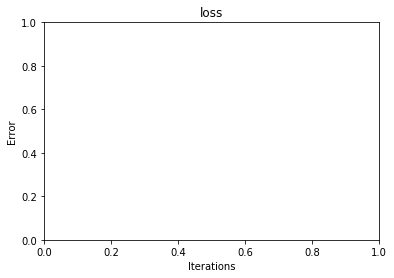

In [35]:
plt.title("loss")
plt.ylabel("Error")
plt.xlabel("Iterations")
plt.plot(loss_list)
plt.figure()
plt.title("Accuracy")
plt.xlabel("Iterations")
plt.ylabel("accuracy")
plt.plot(accuracy_list)


import seaborn as sns

##Accuracy score
accuracy = NN_relu.acc(y_training.flatten(), pred)
pred = NN_relu.feedForward(X_training_scaled)
pred = [np.argmax(x) for x in pred]

plt.figure(figsize=(10,10))
ax = plt.subplot()
## Confusion matrix
cm = NN.confusion_matrix(y_training, pred)
ax.set_ylabel("Actual label")
ax.set_xlabel("Predicted value")
ax.set_title("Accuracy score {} %".format(round(accuracy*100),2))

ax = sns.heatmap(cm, annot=True, square=True, cbar=False, fmt='g')
ax.set_ylim(10,0) #maked heatmap showiung all squares

for i in np.arange(len(np.unique(y_training))):
    print("Precision for label {} is {}".format(i, round(NN_relu.precision(i, cm),2)))
    print("Recall for label {} is {}".format(i, round(NN_relu.recall(i, cm),2)))

### Save trained model to binary files

In [36]:
import os
import pickle
with open(os.path.join(".","NN_ReLU_W1.pkl"), "bw") as fh:
    data = (NN_relu.W1)
    pickle.dump(data, fh)
with open(os.path.join(".","NN_ReLU_W2.pkl"), "bw") as fh:
    data = (NN_relu.W2)
    pickle.dump(data, fh)
with open(os.path.join(".","loss-relu_NN.pkl"), "bw") as fh:
    data = (loss_list)
    pickle.dump(data, fh)
with open(os.path.join(".","acc-relu_NN.pkl"), "bw") as fh:
    data = (accuracy_list)
    pickle.dump(data, fh)
with open(os.path.join(".","iteration_list_ReLU.pkl"), "bw") as fh:
    data = (iteration_list)
    pickle.dump(data, fh)
with open(os.path.join(".","intermediate_weights_relu.pkl"), "bw") as fh:
    data = (intermediate_weights)
    pickle.dump(data, fh)


NameError: name 'loss_list' is not defined

In [37]:
predictions = NN_relu.feedForward(X_test_scaled)
predictions = [np.argmax(x) for x in predictions]
testAcc = NN_relu.acc(y_test.flatten(), predictions)
print("Test accuracy : ", testAcc)


weights = np.array(intermediate_weights)

testAcc = []
for i in range(len (intermediate_weights)):
    NN_relu.W1 = intermediate_weights[i][0]
    NN_relu.W2 = intermediate_weights[i][1]
    predictions = NN_relu.feedForward(X_test_scaled)
    predictions = [np.argmax(x) for x in predictions]
    testAcc.append( NN_relu.acc(y_test.flatten(), predictions))



Test accuracy :  0.1952980946527351


NameError: name 'intermediate_weights' is not defined

In [ ]:
plt.plot(testAcc)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Test accuracy for ReLU implementations", fontsize=(15))


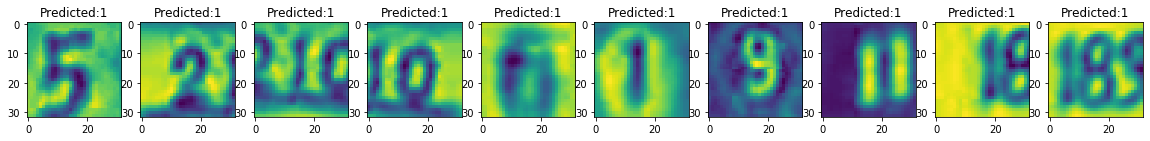

actual labels: [ 5  2  1 10  6  1  9  1  1  8]


In [38]:
fig, ax = plt.subplots(1,10, figsize=(20,10))
for i in np.arange(10):
    predicted = (predictions[i]) +1
    ax[i].set_title("Predicted:{}".format(predicted))
    #ax[i].imshow(X_training[i].reshape(32,32))
   
    ax[i].imshow(X_test[i].reshape(32,32))
plt.show()

print("actual labels:",  y_test[:10].flatten()+1)

*******
## Task 3: implementing softmax classifer
The softmax activation functions is about the probability. The sigmoid function, that we have used as the activation function so far has been working as a probability. However, the output for our ten classes' sum has not added up to 1,therefore, it is not a probability by definition. However, the softmax activation function is assigning each output a probability, which is what we are looking for when classifying. 

To illustrate the shortcomings of the sigmoid function we assume that we have 6 output neurons with the last weighted sum vector being [1,2,3,4,5,6]. **If it is put into the sigmoid function we get [0.5, 0.73,0.88,0.95,0.98,0.99]**. The distribution of the probabilities does not add up to 1. On the oth


$$f_{i}(\overrightarrow a)=\frac {e^{a_{i}}}{\sum _{k}e^{a_k} }$$


Where a is the input vector (weighted sum from last layer). As the formula says for each label the output will be $e^{weighted sum}$ divided with the sum of all the output neurons $e ^ {weighted sum}$. The distrubtion will therefore be dependent on each other, and the sum will be 1.

In [30]:
def softmax(a):
    a = np.array(a)
    return np.exp(a) / np.sum(np.exp(a), axis=0)


test_input = [[3.0,1.0,2.0,1.0],[1,2,3,4]]

print(softmax(test_input))

[[0.88079708 0.26894142 0.26894142 0.04742587]
 [0.11920292 0.73105858 0.73105858 0.95257413]]


## Visualize softmax vs sigmoid output

z2 =  [1, 2, 3, 4, 1, 2, 3]
Sigmoid activation =  [0.73105858 0.88079708 0.95257413 0.98201379 0.73105858 0.88079708
 0.95257413]
Sofmax =  [0.02364054 0.06426166 0.1746813  0.474833   0.02364054 0.06426166
 0.1746813 ]


<BarContainer object of 7 artists>

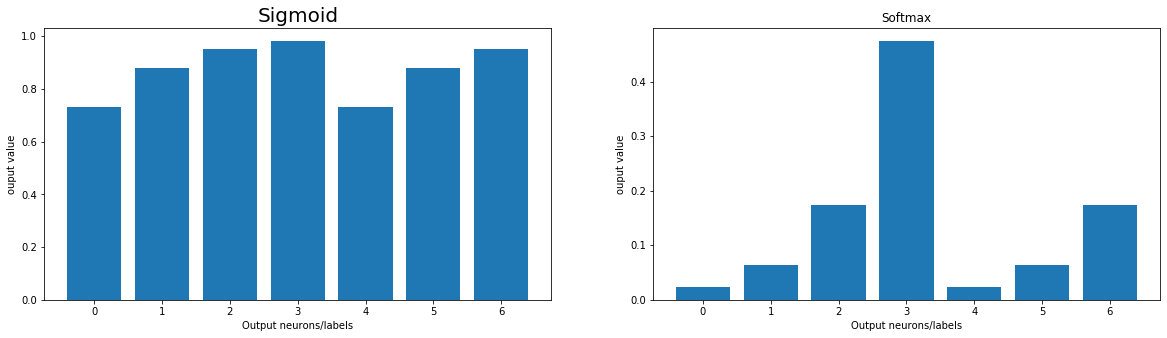

In [40]:
test_z2 = [1,2,3,4,1,2,3]

sigmoid_activations_output = sigmoid(test_z2)
softmax_output = softmax(test_z2)

print("z2 = ", test_z2)
print("Sigmoid activation = ", sigmoid_activations_output)
print("Sofmax = ", softmax_output)


fig,ax = plt.subplots(1,2, figsize=(20,5))
ax[0].set_title("Sigmoid", fontsize=20)
ax[0].set_xlabel("Output neurons/labels")
ax[0].set_ylabel("ouput value")
ax[0].bar(x=np.arange(len(softmax_output)), height=sigmoid_activations_output )




ax[1].set_title("Softmax")
ax[1].set_xlabel("Output neurons/labels")
ax[1].set_ylabel("ouput value")
ax[1].bar(x=np.arange(len(softmax_output)), height=softmax_output )


## Derivative of softmax - (used in back propogation)

In order to take the derivative of the softmax function we can use the quotient rule of calculus. It says if:
$$ f(x) = \frac{g(x)}{h(x)} $$

**Then:** 

$$ f(x)' = \frac {g'(x)h(x)-h'(x)g(x)}{h(x)}$$


The  in our case this holds : 

$$g _ i =  e^{a_i} $$

$$h_i = \sum e^{a_k} $$

**********
We take the partial derivative w.r.t. the weighted sum because we will derive the partial derivative of the cost function w.r.t. the weights by using the chain rule. So in order to get the partial derivative of the softmax w.r.t. the weighted sum we get the following notation. 

$$\frac {\partial a_{i}}{\partial z_{j}} =\frac {\partial}{\partial z_j} \big ( \frac {e^{z_i}} {\sum_{k} e^{z_k} } \big)$$



*********
### Then $g'(x)$ is : ###



$$\frac {\partial } {\partial z _j} (e^{z_i})=  \left\{ \begin{array}{lr}e^{z_i}, i = j \\ 0,  i \neq  j \end{array}\right. $$

*************
### Then $h'(x)$ is : ###


$$\frac {\partial } {\partial z _j} (\sum_{k} e^{z_k})= e^{z_j}$$

**********

### Putting it al togheter yields two results, 
When **$i = j$** the result look much like the one we have for sigmoid :

$$\frac {\partial a_i } {\partial z _j} = a_i(i-a_i)$$

When $i \neq j$ we get the following:


$$\frac {\partial a_i } {\partial z _j} = -a_i{a_j}$$

[http://www.adeveloperdiary.com/data-science/deep-learning/neural-network-with-softmax-in-python/]






In [41]:
#The softmax function's partial derivative with respect to the weighted sum is 

#$$\frac {\partial \sigma (\overrightarrow a)}{\partial  a_{j}} = \sigma _{i}(\overrightarrow a)\big( \delta _{ij} - \sigma _{j}(\overrightarrow a) \big ) $$

#No graph can represent the derivative for the softmax function. It is becuase it takes the whole vector **a** instead of each element inside the vectors, like for example the sigmoid does. We have illustrated it by annotating the input conventionally with an arrow above the a: indicating it is a vector.  The delta is the kronecker delta.

In [42]:
def softmax_grad(z):
    # Reshape the 1-d softmax to 2-d so that np.dot will do the matrix multiplication
    ##Vectorized version that will hold the i = j clause
    # s i the softmax of the x
    z = softmax(z)
    s = z.reshape(-1,1)
    return np.diagflat(s) - np.dot(s, s.T) # this simple line of code is obeying the i = j difference of output


In [43]:
test_output = softmax([1,3,1,1,1])

print(test_output)

softmax_grad(test_output)

[0.08780359 0.64878564 0.08780359 0.08780359 0.08780359]


array([[ 0.14362012, -0.05295834, -0.03022059, -0.03022059, -0.03022059],
       [-0.05295834,  0.21183336, -0.05295834, -0.05295834, -0.05295834],
       [-0.03022059, -0.05295834,  0.14362012, -0.03022059, -0.03022059],
       [-0.03022059, -0.05295834, -0.03022059,  0.14362012, -0.03022059],
       [-0.03022059, -0.05295834, -0.03022059, -0.03022059,  0.14362012]])

## Categorical cross entropy cost function 
We will need to use the cross entropy as cost function. The entropy is based on information theory that tells how many questions you have to ask to know what symbol e.g. a machine will produce, if you already know the probability distribution of the symbols. As we will get a probability distribution from softmax this is applicable. So if the entropy drops we can ask fewer questions, which means we will need to minimize the entropy.

$$ H(y,a) = - \sum y_{i} loga_{i}$$




In [44]:
test_output = softmax([[1,4,1,1,1],[1,2,3,4,5]])

print("the output from the softmax:", test_output)

test_target = [[0,1,0,0,0],[0,0,0,1,0]]

print("Test-target,", test_target)


def cross_entropy(output, target):
    loss =  target * np.log(output)
    print("loss", loss)
    return -np.sum(loss)

loss = cross_entropy(test_output, test_target)
print(loss)


the output from the softmax: [[0.5        0.88079708 0.11920292 0.04742587 0.01798621]
 [0.5        0.11920292 0.88079708 0.95257413 0.98201379]]
Test-target, [[0, 1, 0, 0, 0], [0, 0, 0, 1, 0]]
loss [[-0.         -0.12692801 -0.         -0.         -0.        ]
 [-0.         -0.         -0.         -0.04858735 -0.        ]]
0.17551536261671466


### When using the cross entropy with softmax (as conventional) the partial derivative of the Loss w.r.t. z has an elegant solution.


$$\frac {\partial C}{\partial z_i} = \hat y - y$$

Before we took the partial derivative of the cost function to the activation and by chain rule we took the multiplication with the partial derivative of the activation to the weighted sum to get the partial derivative of the cost function to the weighted sum (delta2). Now we can omit those steps and directly get delta2 directyl by the defintion above. An elegant and simple solution.


### Rescale
When using the cross entropy we want to rescale our target to be either 0 or 1, instead of being 0.01 and 0.99. It is because the 0's is canceling out the cross entropy for the wrong classes. We end up with minimizing the cross entropy of only the target class


## Finaly, let us train the model with the softmax + crossentropy

We have changed the feedforward last layer activation function to our implementation of softmax. In the training we are calculating the delta2 directly before preceding with the backpropogation. We are implementing a cross_entropy function inside the network.

In [31]:

def softmax(X):
    X = np.array(X)
    biggest = X.max(axis=1)

    temp = X - biggest[:,np.newaxis]
    return np.exp(temp)




class NeuralNetwork_softmax(object):
    
    def __init__(self, bias, input_layer, hidden_layer, output_layer, learning_rate):
        self.inputLayerSize = input_layer
        self.hiddenLayerSize = hidden_layer
        self.outputLayerSize = output_layer
        self.learningRate = learning_rate
        self.bias = bias       
        self.initilize_weights()
        
    def summary(self):
        print("Input layer size : " + str(self.inputLayerSize) + "\n")
        print("Hidden layer size : " +str(self.hiddenLayerSize) + "\n")
        print("Output layer size : " + str(self.outputLayerSize) + "\n")
        
        ##Parameters
        parametersInFirstLayer = np.multiply(self.W1.shape[0], self.W1.shape[1])
        parametersInHiddenLayer = np.multiply(self.W2.shape[0], self.W2.shape[1])
        print("Parameters to train in W1: " + str(parametersInFirstLayer) +"\n")
        print("Parameters to train in W2: " + str(parametersInHiddenLayer) +"\n")

        print("Total parameters: ", str(parametersInFirstLayer + parametersInHiddenLayer))
    
           
    def initilize_weights(self):
        #self.W1 = np.random.rand(self.inputLayerSize, self.hiddenLayerSize) # (1024x16) !16384 parameters! weights from input nodes to hidden layer (1024x16)
        #self.W2 = np.random.rand(self.hiddenLayerSize, self.outputLayerSize) #(16x2) 32parameters weights from hidden layers to output
        
        bias_node = 1 if self.bias else 0 # default self.bias is true
       
        rangeW1 = 2 / np.sqrt(self.inputLayerSize+bias_node) #Get the range to be as defined above 
        distrubutionW1 = truncated_normal(mean=0,sd=1, low=-rangeW1, upp=rangeW1) # Create a normal distrubtion trunctaed within the range
        self.W1 = distrubutionW1.rvs((self.inputLayerSize+bias_node,self.hiddenLayerSize,)) #Randomly distribute the normal distrubtion with correct dimensions 
        
        rangeW2 = 1 / np.sqrt(self.hiddenLayerSize)
        distrubutionW2 = truncated_normal(mean=0, sd=1, low=-rangeW2, upp=rangeW2)
        self.W2 = distrubutionW2.rvs(( self.hiddenLayerSize+bias_node,self.outputLayerSize))
    
    def feedForward(self, x):       
       
   
            x = np.array(x, ndmin=2) # every row is an input

            if self.bias:
                biases = np.ones(len(x))
                x = np.c_[x, biases]  ##adding bias to the input layer # bias is an extra one

    


            self.z1 = np.dot(x, self.W1)

            if self.bias:
                biases = np.ones(len(self.z1))
                self.z1 = np.c_[self.z1, biases]  ##Adding the bias to the hidden layer

            self.a1 = ReLU(self.z1) #Relu activation function


            self.z2 = np.dot(self.a1, self.W2)
            self.a2 = softmax(self.z2)

            return self.a2
        
     
    ##This is the implementatiion of the back-propogation
    def backward(self, iput, output, target):
        
        #Calculate dcdw2 - how much the an arbritary change for each weiight in the W1 matrix affect the cost
        #dcdy = self.MSE_prime(output, target) #partial derivative of error w.r.t. y hat (prediction)
        #print("shape pof dcdy", dcdy.shape)
        #dyDz2 = sigmoid_derivative(self.z2) #Patial derivative of yhat with respect to z2,
        #print("shape of dydz2", dyDz2.shape)
        #delta2 = dcdy * dyDz2
        
        #SOFTMAX - simple and elegant
        delta2 = output - target
        
       # print("shape of delta 2", delta2.shape)
        
        
        dz2dw2 = self.a1.T # partial derivative of z2 with respect to weights
        
        dcdw2 = np.dot( dz2dw2, delta2) # chain rule applied to get derivative of the cost w.r.t. the weights
       # print(dcdw2.shape)
      
        ##Calculate dcdw1 - how much the an arbritary change for each weiight in the W2 matrix affect the cost
        
        dz2da1 =  self.W2.T  # Equals to the weight # Hidden errors
       
        dcda1 = np.dot(delta2, dz2da1 )
        #print("shape",dcda1.shape)
        da1dz1 = ReLU_derivation(self.z1) #the derivative of the activation function for a1 - hidden layer
      
        
        
        delta1 = dcda1 * da1dz1
        
        iput = np.array(iput, ndmin=2) # every row is an input

        if self.bias:
            biases = np.ones(len(iput))
            iput = np.c_[iput, biases]  ##adding bias to the input layer
            
            
        dz1dw1 = iput.T # The matrix product for input and weights - partial derivative of the product mutliplication w.r.t. the weights is simply the input then.
       
        dcdw1 = np.dot(dz1dw1, delta1)
     
        #print(dcdw1.shape)
     
        
        return dcdw1, dcdw2


    def MSE(self,yHat, y): ##Cost function Mean squared error
        return np.sum((yHat - y)**2) / y.size
    
    def MSE_prime(self,yHat, y): # Derivative of the cost fucnction
        return yHat - y
    
    
    
    def cross_entropy(self,output, target):
        loss =  target * np.log(output)
        return -np.sum(loss)
    
    
    def train_single(self, training, target):
        
        network_output= self.feedForward(training)
    
        dcdw1, dcdw2 = self.backward(training, network_output,  target)
    
        ##Update weights
        if self.bias:
             self.W1 = self.W1 - (self.learningRate * dcdw1[:,:-1])
        else:
            self.W1 = self.W1 - (self.learningRate * dcdw1) 
        
        self.W2 = self.W2 - (self.learningRate * dcdw2)
        
        return network_output, target
    
    
    def train(self, data_array, 
              labels_one_hot_array,
              batch_size,
              epochs=1,
              intermediate_results=False):
        
        intermediate_weights = []
        
        
        loss_list = []
        iterations = []
        accuracy_list = []
                        
        iteration_count = 1
        for epoch in range(epochs):  
            print("Epoch {}".format(str(epoch+1)), end="")
        
            for iteration in np.arange(0,len(data_array+1), batch_size): #Move index a batch size for every run
                #print(iteration)
                start_index = iteration
                end_index = iteration+batch_size-1
               
                features = data_array[start_index : end_index]
                targets = labels_one_hot_array[start_index : end_index]
                
                self.train_single(features, targets) #Train the batch size
                                
               ##For intermediate evaluation
                if ((iteration_count % 120 ) == 0 ): #We pick an iteration number to save the loss abnd accuracy
                
                    predicted = self.feedForward(X_training_scaled) # get network ouput
                  
                    
                    predicted_encoded = [np.argmax(x) for x in predicted] 
                    loss = self.cross_entropy(predicted,y_training_one_hot) # Changed from MSE
                    loss_list.append(loss)    
                    #print(loss)
                    acc = self.acc( y_training.flatten(), predicted_encoded)
                    accuracy_list.append(acc)
              
                   
                    
                    np.set_printoptions(precision=2)
                    print("Predicted", predicted[:1])
                    print("Iteration {0} -  loss: {1:.2f}, accuracy: {2:.2f}".format(iteration_count, loss,acc, ))
            

                    iterations.append(iteration_count)                                
                
                iteration_count += 1
            if intermediate_results:
                intermediate_weights.append((self.W1.copy(), 
                                                 self.W2.copy()))                
            
        return intermediate_weights, loss_list, accuracy_list,iterations

  
    ###Evaluations
    
    def evaluate(self, actual, predicted):
        corrects, wrongs = 0, 0
        corrects = len(actual[actual == predicted])
        wrongs = len(actual[actual != predicted])
        
        return corrects, wrongs
    
    
    def acc(self,actual, predicted):
        correct, wrongs = self.evaluate(actual, predicted)
        
        return correct / (correct + wrongs)
    
    def confusion_matrix(self, actual, predicted):
        length = len(np.unique(actual))
        width = length
        cm = np.zeros((width, length))
        for i in range(len(actual)):
            cm[actual[i],predicted[i]] += 1
        return cm
          
    def precision(self, label, confusion_matrix): 
        col = confusion_matrix[:, label]
        return confusion_matrix[label, label] / col.sum()
    
    def recall(self, label, confusion_matrix):
        row = confusion_matrix[label, :]
        return confusion_matrix[label, label] / row.sum()
        

In [46]:
NN_softmax = NeuralNetwork_softmax(bias=True, input_layer=X_training_scaled.shape[1], hidden_layer=16, output_layer=10, learning_rate=0.001)
NN_softmax.summary()

Input layer size : 1024

Hidden layer size : 16

Output layer size : 10

Parameters to train in W1: 16400

Parameters to train in W2: 170

Total parameters:  16570


In [64]:

intermediate_weights, loss_list, accuracy_list, iteration_list = NN_softmax.train(X_training_scaled, y_training_one_hot,batch_size=10, epochs=29, intermediate_results=True)

#NN.feedForward(X_training_scaled[0:10])


Epoch 1

NameError: name 'ReLU_derivation' is not defined

## Underflow and overflow of softmax
The softmax function is producing 'nan' values after some training. It can happen when the softmax function is experiencing underflow or underflow. The function above could be unstable as we can get a NaN error in python due to oversize of the floating point. It is suggested to multiply both the denominator and the nominator with a constant $ C $ 

In [32]:
def stable_softmax(X):
    X = np.array(X)
    biggest = X.max(axis=1)
    #print("X", X)
    #print("Biggest", biggest)
    #print(X - biggest[:,np.newaxis])
    temp = X - biggest[:,np.newaxis]
    #print(np.exp(temp))
    exps =np.exp(temp)
    sumExps = np.sum(exps, axis=1)
   # print("sum exps", sumExps)
    returnStatement = exps / sumExps[:,np.newaxis]
    return(returnStatement)





class NeuralNetwork_softmax_stabilized(object):
    
    def __init__(self, bias, input_layer, hidden_layer, output_layer, learning_rate):
        self.inputLayerSize = input_layer
        self.hiddenLayerSize = hidden_layer
        self.outputLayerSize = output_layer
        self.learningRate = learning_rate
        self.bias = bias       
        self.initilize_weights()
        
    def summary(self):
        print("Input layer size : " + str(self.inputLayerSize) + "\n")
        print("Hidden layer size : " +str(self.hiddenLayerSize) + "\n")
        print("Output layer size : " + str(self.outputLayerSize) + "\n")
        
        ##Parameters
        parametersInFirstLayer = np.multiply(self.W1.shape[0], self.W1.shape[1])
        parametersInHiddenLayer = np.multiply(self.W2.shape[0], self.W2.shape[1])
        print("Parameters to train in W1: " + str(parametersInFirstLayer) +"\n")
        print("Parameters to train in W2: " + str(parametersInHiddenLayer) +"\n")

        print("Total parameters: ", str(parametersInFirstLayer + parametersInHiddenLayer))
        print("Learning rate: " + str( self.learningRate) +"\n")
    
           
    def initilize_weights(self):
        #self.W1 = np.random.rand(self.inputLayerSize, self.hiddenLayerSize) # (1024x16) !16384 parameters! weights from input nodes to hidden layer (1024x16)
        #self.W2 = np.random.rand(self.hiddenLayerSize, self.outputLayerSize) #(16x2) 32parameters weights from hidden layers to output
        
        bias_node = 1 if self.bias else 0 # default self.bias is true
       
        rangeW1 = 2 / np.sqrt(self.inputLayerSize+bias_node) #Get the range to be as defined above 
        distrubutionW1 = truncated_normal(mean=0,sd=1, low=-rangeW1, upp=rangeW1) # Create a normal distrubtion trunctaed within the range
        self.W1 = distrubutionW1.rvs((self.inputLayerSize+bias_node,self.hiddenLayerSize,)) #Randomly distribute the normal distrubtion with correct dimensions 
        
        rangeW2 = 1 / np.sqrt(self.hiddenLayerSize)
        distrubutionW2 = truncated_normal(mean=0, sd=1, low=-rangeW2, upp=rangeW2)
        self.W2 = distrubutionW2.rvs(( self.hiddenLayerSize+bias_node,self.outputLayerSize))
    
    def feedForward(self, x):       
       
   
            x = np.array(x, ndmin=2) # every row is an input

            if self.bias:
                biases = np.ones(len(x))
                x = np.c_[x, biases]  ##adding bias to the input layer # bias is an extra one

    


            self.z1 = np.dot(x, self.W1)

            if self.bias:
                biases = np.ones(len(self.z1))
                self.z1 = np.c_[self.z1, biases]  ##Adding the bias to the hidden layer

            self.a1 = ReLU(self.z1) #Relu activation function


            self.z2 = np.dot(self.a1, self.W2)
            self.a2 = stable_softmax(self.z2)

            return self.a2
        
     
    ##This is the implementatiion of the back-propogation
    def backward(self, iput, output, target):
        
        #Calculate dcdw2 - how much the an arbritary change for each weiight in the W1 matrix affect the cost
        #dcdy = self.MSE_prime(output, target) #partial derivative of error w.r.t. y hat (prediction)
        #print("shape pof dcdy", dcdy.shape)
        #dyDz2 = sigmoid_derivative(self.z2) #Patial derivative of yhat with respect to z2,
        #print("shape of dydz2", dyDz2.shape)
        #delta2 = dcdy * dyDz2
        
        #SOFTMAX - simple and elegant
        delta2 = output - target
        
       # print("shape of delta 2", delta2.shape)
        
        
        dz2dw2 = self.a1.T # partial derivative of z2 with respect to weights
        
        dcdw2 = np.dot( dz2dw2, delta2) # chain rule applied to get derivative of the cost w.r.t. the weights
       # print(dcdw2.shape)
      
        ##Calculate dcdw1 - how much the an arbritary change for each weiight in the W2 matrix affect the cost
        
        dz2da1 =  self.W2.T  # Equals to the weight # Hidden errors
       
        dcda1 = np.dot(delta2, dz2da1 )
        #print("shape",dcda1.shape)
        da1dz1 = ReLU_derivation(self.z1) #the derivative of the activation function for a1 - hidden layer
      
        
        
        delta1 = dcda1 * da1dz1
        
        iput = np.array(iput, ndmin=2) # every row is an input

        if self.bias:
            biases = np.ones(len(iput))
            iput = np.c_[iput, biases]  ##adding bias to the input layer
            
            
        dz1dw1 = iput.T # The matrix product for input and weights - partial derivative of the product mutliplication w.r.t. the weights is simply the input then.
       
        dcdw1 = np.dot(dz1dw1, delta1)
     
        #print(dcdw1.shape)
     
        
        return dcdw1, dcdw2


    def MSE(self,yHat, y): ##Cost function Mean squared error
        return np.sum((yHat - y)**2) / y.size
    
    def MSE_prime(self,yHat, y): # Derivative of the cost fucnction
        return yHat - y
    
    
    
    def cross_entropy(self,output, target):
        loss =  target * np.log(output)
        return -np.sum(loss)
    
    
    def train_single(self, training, target):
        
        network_output= self.feedForward(training)
    
        dcdw1, dcdw2 = self.backward(training, network_output,  target)
    
        ##Update weights
        if self.bias:
             self.W1 = self.W1 - (self.learningRate * dcdw1[:,:-1])
        else:
            self.W1 = self.W1 - (self.learningRate * dcdw1) 
        
        self.W2 = self.W2 - (self.learningRate * dcdw2)
        
        return network_output, target
    
    
    def train(self, data_array, 
              labels_one_hot_array,
              batch_size,
              epochs=1,
              intermediate_results=False):
        
        intermediate_weights = []
        
        
        loss_list = []
        iterations = []
        accuracy_list = []
                        
        iteration_count = 1
        for epoch in range(epochs):  
            print("Epoch {}".format(str(epoch+1)), end="")
        
            for iteration in np.arange(0,len(data_array+1), batch_size): #Move index a batch size for every run
                #print(iteration)
                start_index = iteration
                end_index = iteration+batch_size-1
               
                features = data_array[start_index : end_index]
                targets = labels_one_hot_array[start_index : end_index]
                
                self.train_single(features, targets) #Train the batch size
                                
               ##For intermediate evaluation
                if ((iteration_count % 120 ) == 0 ): #We pick an iteration number to save the loss abnd accuracy
                
                    predicted = self.feedForward(X_training_scaled) # get network ouput
                  
                    
                    predicted_encoded = [np.argmax(x) for x in predicted] 
                    loss = self.cross_entropy(predicted,y_training_one_hot_unscaled) # Changed from MSE
                    #loss = self.MSE(predicted_encoded, y_training.flatten())
                    loss_list.append(loss)    
                    #print(loss)
                    acc = self.acc( y_training.flatten(), predicted_encoded)
                    accuracy_list.append(acc)
              
                   
                    
                    np.set_printoptions(precision=2)
                    print("Predicted", predicted[:1])
                    print("Iteration {0} -  loss: {1:.2f}, accuracy: {2:.2f}".format(iteration_count, loss,acc, ))
            

                    iterations.append(iteration_count)                                
                
                iteration_count += 1
            if intermediate_results:
                intermediate_weights.append((self.W1.copy(), 
                                                 self.W2.copy()))                
            
        return intermediate_weights, loss_list, accuracy_list,iterations

  
    ###Evaluations
    
    def evaluate(self, actual, predicted):
        corrects, wrongs = 0, 0
        corrects = len(actual[actual == predicted])
        wrongs = len(actual[actual != predicted])
        
        return corrects, wrongs
    
    
    def acc(self,actual, predicted):
        correct, wrongs = self.evaluate(actual, predicted)
        
        return correct / (correct + wrongs)
    
    def confusion_matrix(self, actual, predicted):
        length = len(np.unique(actual))
        width = length
        cm = np.zeros((width, length))
        for i in range(len(actual)):
            cm[actual[i],predicted[i]] += 1
        return cm7
          
    def precision(self, label, confusion_matrix): 
        col = confusion_matrix[:, label]
        return confusion_matrix[label, label] / col.sum()
    
    def recall(self, label, confusion_matrix):
        row = confusion_matrix[label, :]
        return confusion_matrix[label, label] / row.sum()
        

In [33]:
NN_softmax_stable = NeuralNetwork_softmax_stabilized(bias=True, input_layer=X_training_scaled.shape[1], hidden_layer=16, output_layer=10, learning_rate=0.02)
NN_softmax_stable.summary()

Input layer size : 1024

Hidden layer size : 16

Output layer size : 10

Parameters to train in W1: 16400

Parameters to train in W2: 170

Total parameters:  16570
Learning rate: 0.02



In [34]:
output = NN_softmax_stable.feedForward(X_training_scaled)
cross_entropy = NN_softmax_stable.cross_entropy(output, y_training_one_hot_unscaled)

#print("Sum of 1 row", np.sum(output, axis=1))
print("crossEnttropyu", cross_entropy)

crossEnttropyu 176460.1303568979


In [35]:
intermediate_weights, loss_list, accuracy_list, iteration_list = NN_softmax_stable.train(X_training_scaled, y_training_one_hot_unscaled,batch_size=5, epochs=29, intermediate_results=True)


Epoch 1Predicted [[0.17 0.11 0.1  0.09 0.1  0.08 0.08 0.09 0.09 0.09]]
Iteration 120 -  loss: 165296.04, accuracy: 0.19
Predicted [[0.21 0.12 0.12 0.1  0.09 0.07 0.07 0.08 0.07 0.08]]
Iteration 240 -  loss: 164371.32, accuracy: 0.19


KeyboardInterrupt: 

### Save the softmax+cross entropy model

In [3]:
import os
import pickle
with open(os.path.join(".","NN_softmax_W1.pkl"), "bw") as fh:
    data = (NN_softmax_stable.W1)
    pickle.dump(data, fh)
with open(os.path.join(".","NN_softmax_W2.pkl"), "bw") as fh:
    data = (NN_softmax_stable.W2)
    pickle.dump(data, fh)
with open(os.path.join(".","NN_softmax_network.pkl"), "bw") as fh:
    data = (loss_list)
    pickle.dump(data, fh)
with open(os.path.join(".","acc-NN_softmax.pkl"), "bw") as fh:
    data = (accuracy_list)
    pickle.dump(data, fh)

    


NameError: name 'NN_softmax_stable' is not defined

## Evaluate the softmax + Cross Entropy

************

## Task 4: implementing fully connected NN

We will implement a Neural Network with multiple hidden layers, that can be specified at initlization

## Multiple hidden layers

We define a new parameter called network structure where we specify amount of layers and nodes. We have to redefine the:

        1. weight initilization, 
        2. feed forward
        3. backpropogation. 
        
We specify the 'network structure' parameter as a list with the form  **[input_nodes, hidden1_nodes, ... , hidden_n_nodes, output_nodes]**


### Weight initlization
We loop over the amount of layer and put the corresponding weight vectors inside a weight matrix. We also change the weight shape to be more intutive. The shape will be (out_nodes, in_nodes + bias). That means that each row is the input neurons corresponding weight. When we take the dot product of the transpose of the weight matrix with the input we get the each get the weighted sum of all input neurons with their corresponding weights. 

In [36]:
class NeuralNetwork_weights(object):
    def __init__(self, network_structure):
        self.structure = network_structure
        self.initilize_weights()
        
    
    def initilize_weights(self):
        bias_node = 1 
        self.weights_matrices = []
        layer_index = 1
        no_of_layers = len(self.structure)
        
        while layer_index < no_of_layers:
          

            nodes_in = self.structure[layer_index-1] # get layer 0 first run and then incremented
            nodes_out = self.structure[layer_index] # Gets the next layer
            
            rangeWeightLayer =  1 / np.sqrt(nodes_in)
            distrubutionWeightLayer = truncated_normal(mean=2, sd=1, low=-rangeWeightLayer, upp=rangeWeightLayer)
            weightLayer = distrubutionWeightLayer.rvs(( nodes_out, nodes_in + bias_node))
            self.weights_matrices.append(weightLayer)
            layer_index += 1

In [37]:
test_weights_nn = NeuralNetwork_weights(network_structure=[24,16,16,4])

print("Network structure = ", test_weights_nn.structure)
print("Shape of W1 = ", test_weights_nn.weights_matrices[0].shape)
print("Shape of W2 = ", test_weights_nn.weights_matrices[1].shape)
print("Shape of W3 = ", test_weights_nn.weights_matrices[2].shape)

Network structure =  [24, 16, 16, 4]
Shape of W1 =  (16, 25)
Shape of W2 =  (16, 17)
Shape of W3 =  (4, 17)


Each weight layer has one extra row for the bias.


### Feed forward

In [38]:
class NN_test_feed_forward(object):
    def __init__(self, bias, network_structure):
        self.structure = network_structure
        self.bias = bias
        self.initilize_weights()
        
    
    def initilize_weights(self):
        bias_node = 1 
        self.weights_matrices = []
        layer_index = 1
        no_of_layers = len(self.structure)
        
        while layer_index < no_of_layers:
          

            nodes_in = self.structure[layer_index-1] # get layer 0 first run and then incremented
            nodes_out = self.structure[layer_index] # Gets the next layer
            
            rangeWeightLayer =  1 / np.sqrt(nodes_in)
            distrubutionWeightLayer = truncated_normal(mean=2, sd=1, low=-rangeWeightLayer, upp=rangeWeightLayer)
            weightLayer = distrubutionWeightLayer.rvs((nodes_in + bias_node, nodes_out))
            self.weights_matrices.append(weightLayer)
            layer_index += 1


    def feedForward(self, x):       

            no_of_layers = len(self.structure)
            x = np.array(x, ndmin=2) # every row is an input
            
            if self.bias:
                biases = np.ones(len(x))
                x = np.c_[x, biases]  ##adding bias to the input layer


            layer_index = 1
            # The input vectors to the various layers

            in_vector = x

            while layer_index < no_of_layers-1:

                z = np.dot(in_vector, self.weights_matrices[layer_index-1])

                a = ReLU(z) #sigmoid activation function


                in_vector = a
                #input vector for next layer
                if self.bias:
                    biases = np.ones(len(in_vector))
                    in_vector = np.c_[in_vector, biases]  ##Adding the bias to the hidden layer

                layer_index += 1

            #Last layer softmax or sigmoid
            lastZ = np.dot(in_vector, self.weights_matrices[layer_index-1])
            output_network = sigmoid(lastZ)


            return output_network
        

In [39]:
NN_test_feed = NN_test_feed_forward(bias=True,  network_structure=[1024, 16,3,10])

NN_test_feed.feedForward(X_training_scaled[1:5])

array([[0.53, 0.58, 0.43, 0.59, 0.66, 0.66, 0.55, 0.61, 0.6 , 0.62],
       [0.56, 0.59, 0.41, 0.6 , 0.64, 0.7 , 0.59, 0.61, 0.63, 0.63],
       [0.57, 0.59, 0.4 , 0.63, 0.68, 0.7 , 0.58, 0.62, 0.64, 0.59],
       [0.55, 0.58, 0.41, 0.61, 0.66, 0.68, 0.56, 0.61, 0.62, 0.61]])

### Backpropogation
We have caluculated the gradient for the hidden layer step by step. If we want to add more hidden layers in intilization we need to make a procedure for calculating the gradients for the hidden layers. We will construct a general computation for each layer from the chain rule:

$$\frac {\partial p(a)} {\partial a} = \sum \frac {\partial p(a)}{\partial q_i (a)}\frac {\partial q_i (a)}{\partial (a)}$$


$a$ = unit layer
$q_i$ = pre activation in the layer above
$p(a)$ = loss function



The last weight matrix is going to be the same but we are increasing the hidden weight matrices. The backpropogation for the hidden layers can be generlized with the function:

We perform a feedforward in the backward function where we save the intermediate output from each layer: in the loop we perform three operations
 
     1. ass bias to input vector, often denoted  a
     2. weighted sum often denoted z
     3. The activation of the weighted sum (next layer input). often denoted a+1
     
When we take the derivative to the hidden weights from the hidden layers there is a slightly different computation as described in earlier sections. We take the derivative across our synapses. 



In [72]:
def stable_softmax(X):
    X = np.array(X)
    biggest = X.max(axis=1)
    #print("X", X)
    #print("Biggest", biggest)
    #print(X - biggest[:,np.newaxis])
    temp = X - biggest[:,np.newaxis]
    #print(np.exp(temp))
    exps =np.exp(temp)
    sumExps = np.sum(exps, axis=1)
   # print("sum exps", sumExps)
    returnStatement = exps / sumExps[:,np.newaxis]
    return(returnStatement)


class full_connected_NN(object):
    
    def __init__(self, bias, network_structure, learning_rate):
        self.structure = network_structure
        self.learningRate = learning_rate
        self.bias = bias       
        self.initilize_weights()
        
    def summary(self):
        print("Input layer size : " + str(self.inputLayerSize) + "\n")
        print("Hidden layer size : " +str(self.hiddenLayerSize) + "\n")
        print("Output layer size : " + str(self.outputLayerSize) + "\n")
        
        ##Parameters
        parametersInFirstLayer = np.multiply(self.W1.shape[0], self.W1.shape[1])
        parametersInHiddenLayer = np.multiply(self.W2.shape[0], self.W2.shape[1])
        print("Parameters to train in W1: " + str(parametersInFirstLayer) +"\n")
        print("Parameters to train in W2: " + str(parametersInHiddenLayer) +"\n")

        print("Total parameters: ", str(parametersInFirstLayer + parametersInHiddenLayer))
        print("Learning rate: " + str( self.learningRate) +"\n")
    
           
    def initilize_weights(self):
        print("inside init weghts")
        #self.W1 = np.random.rand(self.inputLayerSize, self.hiddenLayerSize) # (1024x16) !16384 parameters! weights from input nodes to hidden layer (1024x16)
        #self.W2 = np.random.rand(self.hiddenLayerSize, self.outputLayerSize) #(16x2) 32parameters weights from hidden layers to output
        bias_node = 1 if self.bias else 0
        self.weights_matrices = []
        layer_index = 1
        no_of_layers = len(self.structure)
        
        while layer_index < no_of_layers:
            print("inside init weghts")

            nodes_in = self.structure[layer_index-1] # get layer 0 first run and then incremented
            nodes_out = self.structure[layer_index] # Gets the next layer
            
            rangeWeightLayer =  1 / np.sqrt(nodes_in)
            distrubutionWeightLayer = truncated_normal(mean=2, sd=1, low=-rangeWeightLayer, upp=rangeWeightLayer)
            weightLayer = distrubutionWeightLayer.rvs(( nodes_in + bias_node, nodes_out))
            self.weights_matrices.append(weightLayer)
            layer_index += 1
            
            
    def feedForward(self, x):       
       
        no_of_layers = len(self.structure)
        x = np.array(x, ndmin=2) # every row is an input
        if self.bias:
            biases = np.ones(len(x))
            x = np.c_[x, biases]  ##adding bias to the input layer
        
        
        layer_index = 1
        # The input vectors to the various layers
        
        in_vector = x
        
        while layer_index < no_of_layers-1:
            
            
            z = np.dot(in_vector, self.weights_matrices[layer_index-1])
    
            a = ReLU(z) #sigmoid activation function
            
            in_vector = a
            #input vector for next layer
            if self.bias:
                biases = np.ones(len(in_vector))
                in_vector = np.c_[in_vector, biases]  ##Adding the bias to the hidden layer
            
            layer_index += 1
            
        #Last layer softmax or sigmoid
        lastZ = np.dot(in_vector, self.weights_matrices[layer_index-1])
        output_network = stable_softmax(lastZ)
        
        
        return output_network
        
     
    def backward(self, iput, target):
        
        ##################GET the output and input vectors for the feedforward###########
    
        no_of_layers = len(self.structure)        
        input_vector = np.array(iput, ndmin=2)
        layer_index = 0
        # The output/input vectors of the hidden layers layers:
       
        res_vectors = [input_vector]          
        while layer_index < no_of_layers - 1: #
            in_vector = res_vectors[-1] # Get the output from last layer
           
            if self.bias:
                # adding bias node to the end of the 'input'_vector
                
                biases = np.ones((len(in_vector),1))
                in_vector = np.concatenate((in_vector, biases), axis=1) ##adding bias to the input layer for every layer
             
          
            res_vectors[-1] = in_vector # Save the input vector with added bias
            z = np.dot(in_vector, self.weights_matrices[layer_index]) # The weighted sum  - often denoted z
            res_vectors.append(z)
            if(layer_index == no_of_layers-2):
                out_vector = stable_softmax(z)
                
               
            else:
                out_vector = ReLU(z)
            res_vectors.append(out_vector)   
            layer_index += 1
        
    
        #############  LAST LAYER WEIGHTS UPDATE ########################
        weight_gradients = []
          
        deltaLast = res_vectors[-1] - target ##Sofmax impementation
       
        dz2dw2 = res_vectors[-3].T # partial derivative of z2 with respect to weights

        #### UPDATE WEIGHTS OF LAST LAYER
        dcdw2 = np.dot( dz2dw2, deltaLast) # chain rule applied to get derivative of the cost w.r.t. the weights
        weight_gradients.append(dcdw2) # Transpose so each row is the the weight from each node, not each column
        
    
        
       ####HIDDEN LAYERS
        
        index_vecor = len(res_vectors) - 4
        
        layer_index = no_of_layers - 1
       
        while layer_index > 1:
            dzda = self.weights_matrices[layer_index-1].T #Weight between layers
            dcda = np.dot(deltaLast, dzda)
            dadz = ReLU_derivation(res_vectors[index_vecor])
            delta = dcda[:,:-1] * dadz #Take away bias as input to get delta
            deltaLast = delta
            dcdw = np.dot(res_vectors[index_vecor-1].T,delta)
            weight_gradients.append(dcdw)            
            layer_index -= 1
            index_vecor -= 2
            
        
        return weight_gradients


    def MSE(self,yHat, y): ##Cost function Mean squared error
        return np.sum((yHat - y)**2) / y.size
    
    def MSE_prime(self,yHat, y): # Derivative of the cost fucnction
        return yHat - y
    
    
    
    def cross_entropy(self,output, target):
        loss =  target * np.log(output)
        return -np.sum(loss)
    
    
    def train_single(self, training, target):
        
        gradients = self.backward(training, target)
       
        weight_index = len(self.weights_matrices) -1
        for i in range(len(gradients)):
            self.weights_matrices[weight_index] = self.weights_matrices[weight_index] - (self.learningRate * gradients[i])
            weight_index -= 1
    
    
    def train(self, data_array, 
              labels_one_hot_array,
              batch_size,
              epochs=1,
              intermediate_results=False):
        
        intermediate_weights = []
        
        
        loss_list = []
        iterations = []
        accuracy_list = []
                        
        iteration_count = 1
        for epoch in range(epochs):  
            print("Epoch {}".format(str(epoch+1)), end="")
        
            for iteration in np.arange(0,len(data_array+1), batch_size): #Move index a batch size for every run
                #print(iteration)
                start_index = iteration
                end_index = iteration+batch_size-1
               
                features = data_array[start_index : end_index]
                targets = labels_one_hot_array[start_index : end_index]
                
                self.train_single(features, targets) #Train the batch size
                                
               ##For intermediate evaluation
                if ((iteration_count % 120 ) == 0 ): #We pick an iteration number to save the loss abnd accuracy
                
                    predicted = self.feedForward(X_training_scaled) # get network ouput
                  
                    
                    predicted_encoded = [np.argmax(x) for x in predicted] 
                    loss = self.cross_entropy(predicted,y_training_one_hot_unscaled) # Changed from MSE
                    #loss = self.MSE(predicted_encoded, y_training.flatten())
                    loss_list.append(loss)    
                    #print(loss)
                    acc = self.acc( y_training.flatten(), predicted_encoded)
                    accuracy_list.append(acc)
              
                   
                    
                    np.set_printoptions(precision=2)
                    print("Predicted", predicted[:1])
                    print("Iteration {0} -  loss: {1:.2f}, accuracy: {2:.2f}".format(iteration_count, loss,acc, ))
            

                    iterations.append(iteration_count)                                
                
                iteration_count += 1
            if intermediate_results:
                intermediate_weights.append(self.weights_matrices)                
            
        return intermediate_weights, loss_list, accuracy_list,iterations

  
    ###Evaluations
    
    def evaluate(self, actual, predicted):
        corrects, wrongs = 0, 0
        corrects = len(actual[actual == predicted])
        wrongs = len(actual[actual != predicted])
        
        return corrects, wrongs
    
    
    def acc(self,actual, predicted):
        correct, wrongs = self.evaluate(actual, predicted)
        
        return correct / (correct + wrongs)
    
    def confusion_matrix(self, actual, predicted):
        length = len(np.unique(actual))
        width = length
        cm = np.zeros((width, length))
        for i in range(len(actual)):
            cm[actual[i],predicted[i]] += 1
        return cm7
          
    def precision(self, label, confusion_matrix): 
        col = confusion_matrix[:, label]
        return confusion_matrix[label, label] / col.sum()
    
    def recall(self, label, confusion_matrix):
        row = confusion_matrix[label, :]
        return confusion_matrix[label, label] / row.sum()
        

## Parameters used
learning rate = 0.2
network structur = 1024, 16 , 16, 10
update rule = 
epochs = 29
batch size = 50


In [ ]:
full_connected_NN = full_connected_NN(bias=True,  network_structure=[1024,16,16,16, 10], learning_rate=0.0002)
full_connected_NN.train(X_training_scaled, y_training_one_hot,batch_size=300, epochs=300, intermediate_results=True)


## Task 2: Regularization

## Dropout

Dropout is usually implemented to prevent overfitting, as our model has not overfitted yet it might not be needed yet. However, it is a good idea to implement to use it.

We set a random probabillity for each node if it should be passed. 

We create a dropout vector we call $d^{layer}$,(with the same shape as the corresponding layer) which we will initlize with random numbers. We will then compare the values of the layer to a choosen number to determine if the node should be droped or not.

$$d^3 = np.random.rand(a^3.shape[0], a^3.shape[1] ) < keepProb$$

If we set keepProb to 0.8, it will dropout 20% on average of the layer as random.rand is generating random numbers between 0 and 1.


For each activation layer we take

$$a_i = np.multiply(a_i,d_i)$$


#### Inverted dropout

We will use inverted dropout which is the most common one. It is based upon scaling up the reamining nodes.

As the final step we will scale the remaining nodes by dividing it with the keepProb scalar we have choosen. We do so because we do not want to change the expexted value of the activation.

$$a_i = \frac {a_i} { keepProb}$$


***We will only implement the forward pass in the backward (which is using for training) as the reason for inverted dropout scale is to account for all active nodes in the testing.***

We define a function in the Neural Network class called reset_weights, which we can call in the training.




In [112]:
def stable_softmax(X):
    X = np.array(X)
    biggest = X.max(axis=1)
    #print("X", X)
    #print("Biggest", biggest)
    #print(X - biggest[:,np.newaxis])
    temp = X - biggest[:,np.newaxis]
    #print(np.exp(temp))
    exps =np.exp(temp)
    sumExps = np.sum(exps, axis=1)
   # print("sum exps", sumExps)
    returnStatement = exps / sumExps[:,np.newaxis]
    return(returnStatement)

import random

class full_connected_NN_dropout(object):
    
    def __init__(self, bias, network_structure, learning_rate, dropout_in_pecentage=0.9, dropout_hidden=True,dropout_in=True, dropout_hidden_percentage=0.9):
        self.structure = network_structure
        self.dropout_in = dropout_in
        self.dropout_hidden = dropout_hidden
        self.dropout_percentage_in = dropout_in_pecentage
        self.dropout_percentage_hidden = dropout_hidden_percentage
        self.learningRate = learning_rate
        self.bias = bias       
        self.initilize_weights()
        
    def summary(self):
        print("Input layer size : " + str(self.inputLayerSize) + "\n")
        print("Hidden layer size : " +str(self.hiddenLayerSize) + "\n")
        print("Output layer size : " + str(self.outputLayerSize) + "\n")
        
        ##Parameters
        parametersInFirstLayer = np.multiply(self.W1.shape[0], self.W1.shape[1])
        parametersInHiddenLayer = np.multiply(self.W2.shape[0], self.W2.shape[1])
        print("Parameters to train in W1: " + str(parametersInFirstLayer) +"\n")
        print("Parameters to train in W2: " + str(parametersInHiddenLayer) +"\n")

        print("Total parameters: ", str(parametersInFirstLayer + parametersInHiddenLayer))
        print("Learning rate: " + str( self.learningRate) +"\n")
    
           
    def initilize_weights(self):
        print("inside init weghts")
        #self.W1 = np.random.rand(self.inputLayerSize, self.hiddenLayerSize) # (1024x16) !16384 parameters! weights from input nodes to hidden layer (1024x16)
        #self.W2 = np.random.rand(self.hiddenLayerSize, self.outputLayerSize) #(16x2) 32parameters weights from hidden layers to output
        bias_node = 1 if self.bias else 0
        self.weights_matrices = []
        layer_index = 1
        no_of_layers = len(self.structure)
        
        while layer_index < no_of_layers:
            print("inside init weghts")

            nodes_in = self.structure[layer_index-1] # get layer 0 first run and then incremented
            nodes_out = self.structure[layer_index] # Gets the next layer
            
            rangeWeightLayer =  1 / np.sqrt(nodes_in)
            distrubutionWeightLayer = truncated_normal(mean=2, sd=1, low=-rangeWeightLayer, upp=rangeWeightLayer)
            weightLayer = distrubutionWeightLayer.rvs(( nodes_in + bias_node, nodes_out))
            self.weights_matrices.append(weightLayer)
            layer_index += 1
            
            
    def feedForward(self, x):       
       
        no_of_layers = len(self.structure)
        x = np.array(x, ndmin=2) # every row is an input
        if self.bias:
            biases = np.ones(len(x))
            x = np.c_[x, biases]  ##adding bias to the input layer
        
        
        layer_index = 1
        # The input vectors to the various layers
        
        in_vector = x
        
        while layer_index < no_of_layers-1:
            
            
            z = np.dot(in_vector, self.weights_matrices[layer_index-1])
    
            a = ReLU(z) #sigmoid activation function
            
            in_vector = a
            #input vector for next layer
            if self.bias:
                biases = np.ones(len(in_vector))
                in_vector = np.c_[in_vector, biases]  ##Adding the bias to the hidden layer
            
            layer_index += 1
            
        #Last layer softmax or sigmoid
        lastZ = np.dot(in_vector, self.weights_matrices[layer_index-1])
        output_network = stable_softmax(lastZ)
        
        
        return output_network
    
    
    
    def dropout(self):
        ##Steps
        weight_matrix = np.array(self.weights_matrices.copy())
        dropout_prob_in = self.dropout_percentage_in
        dropout_prop_hidden = self.dropout_percentage_hidden
        #1 copy the weights to a self.weights_original
        self.weights_matrices_original =weight_matrix
        #2. calculate the active nodes indices
        inputShape = []
        for x in np.arange(len(weight_matrix)):
            inputShape.append(weight_matrix[x].shape[0])
        #3. calcualte the indices for the nodes
        
        
        inputShape = np.array(inputShape)
        active_nodes = inputShape * dropout_prob_in # to round to decimla active nodes in first layer
        active_nodes = [int(x) for x in active_nodes]
        #4. Pick what nodes to drop
        dropoutIndices = []
        for x in range(len(inputShape)):
            indices  = sorted(random.sample(range(0, inputShape[x]), active_nodes[x]))
            dropoutIndices.append(indices)
        
        return dropoutIndices
    
    
    
    
    def resetWeights(self):
        self.weights_matrices = self.weights_matrices_original.copy()
            
        
     
    def backward(self, iput, target):
        
        ##################GET the output and input vectors for the feedforward###########
        
        ####DROPOUT NEW##################
        
        dropoutIndices = self.dropout()
        self.dropoutIndices = dropoutIndices.copy()

        
        ##dropout from first layer
        weights = self.weights_matrices[0].copy()
        new_weights_in = weights[dropoutIndices[0], :]
        
        if self.dropout_in:
            self.weights_matrices[0] = new_weights_in
        
        #############
        
        
        
    
        no_of_layers = len(self.structure)        
        input_vector = np.array(iput, ndmin=2)
        layer_index = 0
        # The output/input vectors of the hidden layers layers:
       
        res_vectors = [input_vector]          
        while layer_index < no_of_layers - 1: #
            in_vector = res_vectors[-1] # Get the output from last layer
           
            if self.bias:
                # adding bias node to the end of the 'input'_vector
                
                biases = np.ones((len(in_vector),1))
                in_vector = np.concatenate((in_vector, biases), axis=1) ##adding bias to the input layer for every layer
                if self.dropout_in and layer_index == 0: ##For first layer dropout
                    
                    in_vector = in_vector[:,dropoutIndices[0]]
                    in_vector = in_vector / self.dropout_percentage_in ##Rescale as the inverted dropout says
                                 
            
            res_vectors[-1] = in_vector # Save the input vector with added bias
            z = np.dot(in_vector, self.weights_matrices[layer_index]) # The weighted sum  - often denoted z
            res_vectors.append(z)
            if(layer_index == no_of_layers-2):
                out_vector = stable_softmax(z)
                
               
            else:
                out_vector = ReLU(z)
            res_vectors.append(out_vector)   
            layer_index += 1
        
    
        #############  LAST LAYER WEIGHTS UPDATE ########################
        weight_gradients = []
          
        deltaLast = res_vectors[-1] - target ##Sofmax impementation
       
        dz2dw2 = res_vectors[-3].T # partial derivative of z2 with respect to weights

        #### UPDATE WEIGHTS OF LAST LAYER
        dcdw2 = np.dot( dz2dw2, deltaLast) # chain rule applied to get derivative of the cost w.r.t. the weights
        weight_gradients.append(dcdw2) # Transpose so each row is the the weight from each node, not each column
        
    
        
       ####HIDDEN LAYERS
        
        index_vecor = len(res_vectors) - 4
        
        layer_index = no_of_layers - 1
       
        while layer_index > 1:
            dzda = self.weights_matrices[layer_index-1].T #Weight between layers
            dcda = np.dot(deltaLast, dzda)
            dadz = ReLU_derivation(res_vectors[index_vecor])
            delta = dcda[:,:-1] * dadz #Take away bias as input to get delta
            deltaLast = delta
            dcdw = np.dot(res_vectors[index_vecor-1].T,delta)
            weight_gradients.append(dcdw)            
            layer_index -= 1
            index_vecor -= 2
            
     
        return weight_gradients


    def MSE(self,yHat, y): ##Cost function Mean squared error
        return np.sum((yHat - y)**2) / y.size
    
    def MSE_prime(self,yHat, y): # Derivative of the cost fucnction
        return yHat - y
    
    
    
    def cross_entropy(self,output, target):
        loss =  target * np.log(output)
        return -np.sum(loss)
    
    
    def train_single(self, training, target):
        
        gradients = self.backward(training, target)
        dropped = [x for x in range(len(self.weights_matrices_original[0])) if x not in self.dropoutIndices[0]]
      
       
        weight_index = len(self.weights_matrices) -1
        for i in range(len(gradients)):
            self.weights_matrices[weight_index] = self.weights_matrices[weight_index] - (self.learningRate * gradients[i])
            weight_index -= 1
            
        if self.dropout_in:
            self.weights_matrices_original[0][self.dropoutIndices[0], :] = self.weights_matrices[0]
            self.weights_matrices[0] = self.weights_matrices_original[0]  
    
    
    def train(self, data_array, 
              labels_one_hot_array,
              batch_size,
              epochs=1,
              intermediate_results=False):
        
        intermediate_weights = []
        
        
        loss_list = []
        iterations = []
        accuracy_list = []
                        
        iteration_count = 1
        for epoch in range(epochs):  
            print("Epoch {}".format(str(epoch+1)), end="")
        
            for iteration in np.arange(0,len(data_array+1), batch_size): #Move index a batch size for every run
                #print(iteration)
                start_index = iteration
                end_index = iteration+batch_size-1
               
                features = data_array[start_index : end_index]
                targets = labels_one_hot_array[start_index : end_index]
                
                self.train_single(features, targets) #Train the batch size
                                
               ##For intermediate evaluation
                if ((iteration_count % 120 ) == 0 ): #We pick an iteration number to save the loss abnd accuracy
                
                    predicted = self.feedForward(X_training_scaled) # get network ouput
                  
                    
                    predicted_encoded = [np.argmax(x) for x in predicted] 
                    loss = self.cross_entropy(predicted,y_training_one_hot_unscaled) # Changed from MSE
                    #loss = self.MSE(predicted_encoded, y_training.flatten())
                    loss_list.append(loss)    
                    #print(loss)
                    acc = self.acc( y_training.flatten(), predicted_encoded)
                    accuracy_list.append(acc)
              
                   
                    
                    np.set_printoptions(precision=2)
                    print("Predicted", predicted[:1])
                    print("Iteration {0} -  loss: {1:.2f}, accuracy: {2:.2f}".format(iteration_count, loss,acc, ))
            

                    iterations.append(iteration_count)                                
                
                iteration_count += 1
            if intermediate_results:
                intermediate_weights.append(self.weights_matrices)                
            
        return intermediate_weights, loss_list, accuracy_list,iterations

  
    ###Evaluations
    
    def evaluate(self, actual, predicted):
        corrects, wrongs = 0, 0
        corrects = len(actual[actual == predicted])
        wrongs = len(actual[actual != predicted])
        
        return corrects, wrongs
    
    
    def acc(self,actual, predicted):
        correct, wrongs = self.evaluate(actual, predicted)
        
        return correct / (correct + wrongs)
    
    def confusion_matrix(self, actual, predicted):
        length = len(np.unique(actual))
        width = length
        cm = np.zeros((width, length))
        for i in range(len(actual)):
            cm[actual[i],predicted[i]] += 1
        return cm
          
    def precision(self, label, confusion_matrix): 
        col = confusion_matrix[:, label]
        return confusion_matrix[label, label] / col.sum()
    
    def recall(self, label, confusion_matrix):
        row = confusion_matrix[label, :]
        return confusion_matrix[label, label] / row.sum()
        

### Let us see how the network will handle a dropout of 10 % in first layer

In [1]:
full_connected_NN_dropout = full_connected_NN_dropout(bias=True,  network_structure=[1024,16,16,10], learning_rate=0.2)
full_connected_NN_dropout.train(X_training_scaled, y_training_one_hot,batch_size=5, epochs=50, intermediate_results=True)


NameError: name 'full_connected_NN_dropout' is not defined

### Implementing l2
Ass a weight penalty to penalize large weights. We implement a weight decay which is specified in intilization as lambda. We add this to a NN that uses Relu and Mean Squared Error as it has gotten the best results so far.

In [67]:
def stable_softmax(X):
    X = np.array(X)
    biggest = X.max(axis=1)
    #print("X", X)
    #print("Biggest", biggest)
    #print(X - biggest[:,np.newaxis])
    temp = X - biggest[:,np.newaxis]
    #print(np.exp(temp))
    exps =np.exp(temp)
    sumExps = np.sum(exps, axis=1)
   # print("sum exps", sumExps)
    returnStatement = exps / sumExps[:,np.newaxis]
    return(returnStatement)


class full_connected_NN_L2(object):
    
    def __init__(self, bias, network_structure, learning_rate, l2Lambda=0.2, useL2=True):
        self.structure = network_structure
        self.useL2 = useL2
        self.l2Lambda = l2Lambda
        self.learningRate = learning_rate
        self.bias = bias       
        self.initilize_weights()
        
    def summary(self):
        print("Input layer size : " + str(self.inputLayerSize) + "\n")
        print("Hidden layer size : " +str(self.hiddenLayerSize) + "\n")
        print("Output layer size : " + str(self.outputLayerSize) + "\n")
        
        ##Parameters
        parametersInFirstLayer = np.multiply(self.W1.shape[0], self.W1.shape[1])
        parametersInHiddenLayer = np.multiply(self.W2.shape[0], self.W2.shape[1])
        print("Parameters to train in W1: " + str(parametersInFirstLayer) +"\n")
        print("Parameters to train in W2: " + str(parametersInHiddenLayer) +"\n")

        print("Total parameters: ", str(parametersInFirstLayer + parametersInHiddenLayer))
        print("Learning rate: " + str( self.learningRate) +"\n")
    
           
    def initilize_weights(self):
        print("inside init weghts")
        #self.W1 = np.random.rand(self.inputLayerSize, self.hiddenLayerSize) # (1024x16) !16384 parameters! weights from input nodes to hidden layer (1024x16)
        #self.W2 = np.random.rand(self.hiddenLayerSize, self.outputLayerSize) #(16x2) 32parameters weights from hidden layers to output
        bias_node = 1 if self.bias else 0
        self.weights_matrices = []
        layer_index = 1
        no_of_layers = len(self.structure)
        
        while layer_index < no_of_layers:
            print("inside init weghts")

            nodes_in = self.structure[layer_index-1] # get layer 0 first run and then incremented
            nodes_out = self.structure[layer_index] # Gets the next layer
            
            rangeWeightLayer =  1 / np.sqrt(nodes_in)
            distrubutionWeightLayer = truncated_normal(mean=2, sd=1, low=-rangeWeightLayer, upp=rangeWeightLayer)
            weightLayer = distrubutionWeightLayer.rvs(( nodes_in + bias_node, nodes_out))
            self.weights_matrices.append(weightLayer)
            layer_index += 1
            
            
    def feedForward(self, x):       
       
        no_of_layers = len(self.structure)
        x = np.array(x, ndmin=2) # every row is an input
        if self.bias:
            biases = np.ones(len(x))
            x = np.c_[x, biases]  ##adding bias to the input layer
        
        
        layer_index = 1
        # The input vectors to the various layers
        
        in_vector = x
        
        while layer_index < no_of_layers-1:
            
            
            z = np.dot(in_vector, self.weights_matrices[layer_index-1])
    
            a = ReLU(z) #sigmoid activation function
            
            in_vector = a
            #input vector for next layer
            if self.bias:
                biases = np.ones(len(in_vector))
                in_vector = np.c_[in_vector, biases]  ##Adding the bias to the hidden layer
            
            layer_index += 1
            
        #Last layer softmax or sigmoid
        lastZ = np.dot(in_vector, self.weights_matrices[layer_index-1])
        output_network = stable_softmax(lastZ)
        
        
        return output_network
        
     
    def backward(self, iput, target):
        
        ##################GET the output and input vectors for the feedforward###########
    
        no_of_layers = len(self.structure)        
        input_vector = np.array(iput, ndmin=2)
        layer_index = 0
        # The output/input vectors of the hidden layers layers:
       
        res_vectors = [input_vector]          
        while layer_index < no_of_layers - 1: #
            in_vector = res_vectors[-1] # Get the output from last layer
           
            if self.bias:
                # adding bias node to the end of the 'input'_vector
                
                biases = np.ones((len(in_vector),1))
                in_vector = np.concatenate((in_vector, biases), axis=1) ##adding bias to the input layer for every layer
             
          
            res_vectors[-1] = in_vector # Save the input vector with added bias
            z = np.dot(in_vector, self.weights_matrices[layer_index]) # The weighted sum  - often denoted z
            res_vectors.append(z)
            if(layer_index == no_of_layers-2):
                out_vector = stable_softmax(z)
                
               
            else:
                out_vector = ReLU(z)
            res_vectors.append(out_vector)   
            layer_index += 1
        
    
        #############  LAST LAYER WEIGHTS UPDATE ########################
        weight_gradients = []
          
        deltaLast = res_vectors[-1] - target ##Sofmax impementation
       
        dz2dw2 = res_vectors[-3].T # partial derivative of z2 with respect to weights

        #### UPDATE WEIGHTS OF LAST LAYER
        dcdw2 = np.dot( dz2dw2, deltaLast) # chain rule applied to get derivative of the cost w.r.t. the weights
        weight_gradients.append(dcdw2) # Transpose so each row is the the weight from each node, not each column
        
    
        
       ####HIDDEN LAYERS
        
        index_vecor = len(res_vectors) - 4
        
        layer_index = no_of_layers - 1
       
        while layer_index > 1:
            dzda = self.weights_matrices[layer_index-1].T #Weight between layers
            dcda = np.dot(deltaLast, dzda)
            dadz = ReLU_derivation(res_vectors[index_vecor])
            delta = dcda[:,:-1] * dadz #Take away bias as input to get delta
            deltaLast = delta
            dcdw = np.dot(res_vectors[index_vecor-1].T,delta)
            weight_gradients.append(dcdw)            
            layer_index -= 1
            index_vecor -= 2
            
        
        return weight_gradients


    def MSE(self,yHat, y): ##Cost function Mean squared error
        return np.sum((yHat - y)**2) / y.size
    
    def MSE_prime(self,yHat, y): # Derivative of the cost fucnction
        return yHat - y
    
    
    
    def cross_entropy(self,output, target):
        loss =  target * np.log(output)
        return -np.sum(loss)
    
    
    def train_single(self, training, target):
        
        gradients = self.backward(training, target)
       
        weight_index = len(self.weights_matrices) -1
        for i in range(len(gradients)):
            if self.useL2:
                self.weights_matrices[weight_index]  = self.weights_matrices[weight_index] * (1-self.l2Lambda)
            self.weights_matrices[weight_index] = self.weights_matrices[weight_index] - (self.learningRate * gradients[i])
            weight_index -= 1
    
    
    def train(self, data_array, 
              labels_one_hot_array,
              batch_size,
              epochs=1,
              intermediate_results=False):
        
        intermediate_weights = []
        
        
        loss_list = []
        iterations = []
        accuracy_list = []
                        
        iteration_count = 1
        for epoch in range(epochs):  
            print("Epoch {}".format(str(epoch+1)), end="")
        
            for iteration in np.arange(0,len(data_array+1), batch_size): #Move index a batch size for every run
                #print(iteration)
                start_index = iteration
                end_index = iteration+batch_size-1
               
                features = data_array[start_index : end_index]
                targets = labels_one_hot_array[start_index : end_index]
                
                self.train_single(features, targets) #Train the batch size
                                
               ##For intermediate evaluation
                if ((iteration_count % 120 ) == 0 ): #We pick an iteration number to save the loss abnd accuracy
                
                    predicted = self.feedForward(X_training_scaled) # get network ouput
                  
                    
                    predicted_encoded = [np.argmax(x) for x in predicted] 
                    loss = self.cross_entropy(predicted,y_training_one_hot_unscaled) # Changed from MSE
                    #loss = self.MSE(predicted_encoded, y_training.flatten())
                    loss_list.append(loss)    
                    #print(loss)
                    acc = self.acc( y_training.flatten(), predicted_encoded)
                    accuracy_list.append(acc)
              
                   
                    
                    np.set_printoptions(precision=2)
                    print("Predicted", predicted[:1])
                    print("Iteration {0} -  loss: {1:.2f}, accuracy: {2:.2f}".format(iteration_count, loss,acc, ))
            

                    iterations.append(iteration_count)                                
                
                iteration_count += 1
            if intermediate_results:
                intermediate_weights.append(self.weights_matrices)                
            
        return intermediate_weights, loss_list, accuracy_list,iterations

  
    ###Evaluations
    
    def evaluate(self, actual, predicted):
        corrects, wrongs = 0, 0
        corrects = len(actual[actual == predicted])
        wrongs = len(actual[actual != predicted])
        
        return corrects, wrongs
    
    
    def acc(self,actual, predicted):
        correct, wrongs = self.evaluate(actual, predicted)
        
        return correct / (correct + wrongs)
    
    def confusion_matrix(self, actual, predicted):
        length = len(np.unique(actual))
        width = length
        cm = np.zeros((width, length))
        for i in range(len(actual)):
            cm[actual[i],predicted[i]] += 1
        return cm7
          
    def precision(self, label, confusion_matrix): 
        col = confusion_matrix[:, label]
        return confusion_matrix[label, label] / col.sum()
    
    def recall(self, label, confusion_matrix):
        row = confusion_matrix[label, :]
        return confusion_matrix[label, label] / row.sum()
        

### Weight decay of 1 %

In [68]:
full_connected_NN_L2 = full_connected_NN_L2(bias=True,  l2Lambda=0.01,network_structure=[1024,16, 10], learning_rate=0.2)
full_connected_NN_L2.train(X_training_scaled, y_training_one_hot,batch_size=5, epochs=50, intermediate_results=True)


inside init weghts
inside init weghts
inside init weghts
Epoch 1Predicted [[0.19 0.1  0.08 0.06 0.11 0.13 0.08 0.07 0.09 0.08]]
Iteration 120 -  loss: 166693.45, accuracy: 0.19
Predicted [[0.3  0.1  0.12 0.15 0.06 0.05 0.06 0.05 0.04 0.09]]
Iteration 240 -  loss: 169368.25, accuracy: 0.19
Predicted [[0.16 0.11 0.13 0.08 0.12 0.09 0.09 0.07 0.07 0.07]]
Iteration 360 -  loss: 165024.25, accuracy: 0.19
Predicted [[0.16 0.11 0.12 0.06 0.13 0.09 0.1  0.07 0.09 0.06]]
Iteration 480 -  loss: 166223.79, accuracy: 0.19
Predicted [[0.24 0.11 0.18 0.1  0.07 0.05 0.05 0.08 0.04 0.08]]
Iteration 600 -  loss: 167294.36, accuracy: 0.19
Predicted [[0.17 0.16 0.07 0.15 0.08 0.06 0.13 0.06 0.06 0.06]]
Iteration 720 -  loss: 166718.16, accuracy: 0.19
Predicted [[0.2  0.13 0.07 0.11 0.07 0.08 0.08 0.07 0.11 0.08]]
Iteration 840 -  loss: 166035.79, accuracy: 0.19
Predicted [[0.18 0.11 0.1  0.11 0.13 0.07 0.07 0.07 0.08 0.08]]
Iteration 960 -  loss: 164951.82, accuracy: 0.19
Predicted [[0.17 0.13 0.1  0.08 

Predicted [[0.14 0.21 0.14 0.11 0.08 0.09 0.06 0.08 0.04 0.05]]
Iteration 8760 -  loss: 166288.50, accuracy: 0.14
Predicted [[0.29 0.1  0.08 0.1  0.1  0.07 0.07 0.05 0.06 0.09]]
Iteration 8880 -  loss: 167000.01, accuracy: 0.19
Predicted [[0.13 0.11 0.14 0.11 0.1  0.07 0.1  0.1  0.08 0.06]]
Iteration 9000 -  loss: 166131.71, accuracy: 0.12
Predicted [[0.36 0.13 0.08 0.09 0.06 0.07 0.04 0.05 0.04 0.07]]
Iteration 9120 -  loss: 169878.33, accuracy: 0.19
Predicted [[0.2  0.17 0.1  0.14 0.07 0.07 0.08 0.06 0.09 0.04]]
Iteration 9240 -  loss: 165557.36, accuracy: 0.19
Predicted [[0.23 0.11 0.16 0.09 0.09 0.07 0.05 0.1  0.04 0.05]]
Iteration 9360 -  loss: 166340.10, accuracy: 0.19
Predicted [[0.2  0.14 0.07 0.12 0.09 0.07 0.1  0.1  0.07 0.05]]
Iteration 9480 -  loss: 165607.06, accuracy: 0.19
Predicted [[0.09 0.2  0.09 0.09 0.07 0.12 0.09 0.09 0.07 0.08]]
Iteration 9600 -  loss: 168728.43, accuracy: 0.14
Predicted [[0.14 0.16 0.16 0.1  0.08 0.06 0.05 0.06 0.11 0.07]]
Iteration 9720 -  loss: 

Predicted [[0.21 0.08 0.13 0.09 0.15 0.06 0.06 0.07 0.06 0.08]]
Iteration 17400 -  loss: 166960.45, accuracy: 0.19
Predicted [[0.22 0.2  0.11 0.06 0.04 0.07 0.07 0.05 0.08 0.1 ]]
Iteration 17520 -  loss: 168541.12, accuracy: 0.19
Predicted [[0.13 0.1  0.1  0.09 0.18 0.07 0.08 0.07 0.09 0.08]]
Iteration 17640 -  loss: 167539.07, accuracy: 0.09
Predicted [[0.2  0.14 0.12 0.12 0.06 0.06 0.07 0.07 0.09 0.07]]
Iteration 17760 -  loss: 165237.49, accuracy: 0.19
Predicted [[0.22 0.14 0.1  0.06 0.09 0.08 0.08 0.08 0.06 0.08]]
Iteration 17880 -  loss: 164963.21, accuracy: 0.19
Predicted [[0.14 0.17 0.06 0.11 0.11 0.05 0.14 0.06 0.07 0.08]]
Iteration 18000 -  loss: 167997.18, accuracy: 0.14


KeyboardInterrupt: 

As both the dropout and the L2 could not converge to the training data, there is no point in testing the trained models to the training set.

### Implementing SGD + momentum
Momentum is added to the gradients to take into consideration the previous deltachanges. So it can get escape get over local optima (small hills). Plan is to calculate the exponential weighted average of our gradient. 

### SGD vs Gradient descent
Stochastich gradient descent is taking small steps towards minmum compared to gradient descent. We have already used stochastich gradient descent in som sence thorughout the implementation. However, the problem with stochastic gradient descent is that is not taking the straight way towards the minimum. Also it can get stuck in local maximum and minimum. There are many different techniques to achive this. One is momentum.


### Momentum
We have to calculate the exponential moving average.
The moving average is simply 
$$grad^{i}=\gamma * grad^{i-1}+grad^{i}$$
gamma is the momentum constant. We also have to specify a period of how many sequences we are calculating moving average for.

In [112]:
def stable_softmax(X):
    X = np.array(X)
    biggest = X.max(axis=1)
    #print("X", X)
    #print("Biggest", biggest)
    #print(X - biggest[:,np.newaxis])
    temp = X - biggest[:,np.newaxis]
    #print(np.exp(temp))
    exps =np.exp(temp)
    sumExps = np.sum(exps, axis=1)
   # print("sum exps", sumExps)
    returnStatement = exps / sumExps[:,np.newaxis]
    return(returnStatement)


class full_connected_NN_Momentum(object):
    
    def __init__(self, bias, network_structure, learning_rate, l2Lambda=0.2, useL2=False, momentum=True):
        self.structure = network_structure
        self.useL2 = useL2
        self.gamma = 0.09
        self.previousGradients = 0
        self.l2Lambda = l2Lambda
        self.learningRate = learning_rate
        self.bias = bias       
        self.initilize_weights()
        
    def summary(self):
        print("Input layer size : " + str(self.inputLayerSize) + "\n")
        print("Hidden layer size : " +str(self.hiddenLayerSize) + "\n")
        print("Output layer size : " + str(self.outputLayerSize) + "\n")
        
        ##Parameters
        parametersInFirstLayer = np.multiply(self.W1.shape[0], self.W1.shape[1])
        parametersInHiddenLayer = np.multiply(self.W2.shape[0], self.W2.shape[1])
        print("Parameters to train in W1: " + str(parametersInFirstLayer) +"\n")
        print("Parameters to train in W2: " + str(parametersInHiddenLayer) +"\n")

        print("Total parameters: ", str(parametersInFirstLayer + parametersInHiddenLayer))
        print("Learning rate: " + str( self.learningRate) +"\n")
    
           
     
    def initlize_momentum(self, iput, target):
        self.previousGradients = self.backward(iput, target)
        
        
    def initilize_weights(self):
        print("inside init weghts")
        #self.W1 = np.random.rand(self.inputLayerSize, self.hiddenLayerSize) # (1024x16) !16384 parameters! weights from input nodes to hidden layer (1024x16)
        #self.W2 = np.random.rand(self.hiddenLayerSize, self.outputLayerSize) #(16x2) 32parameters weights from hidden layers to output
        bias_node = 1 if self.bias else 0
        self.weights_matrices = []
        layer_index = 1
        no_of_layers = len(self.structure)
        
        while layer_index < no_of_layers:
            print("inside init weghts")

            nodes_in = self.structure[layer_index-1] # get layer 0 first run and then incremented
            nodes_out = self.structure[layer_index] # Gets the next layer
            
            rangeWeightLayer =  1 / np.sqrt(nodes_in)
            distrubutionWeightLayer = truncated_normal(mean=2, sd=1, low=-rangeWeightLayer, upp=rangeWeightLayer)
            weightLayer = distrubutionWeightLayer.rvs(( nodes_in + bias_node, nodes_out))
            self.weights_matrices.append(weightLayer)
            layer_index += 1
            
            
    def feedForward(self, x):       
       
        no_of_layers = len(self.structure)
        x = np.array(x, ndmin=2) # every row is an input
        if self.bias:
            biases = np.ones(len(x))
            x = np.c_[x, biases]  ##adding bias to the input layer
        
        
        layer_index = 1
        # The input vectors to the various layers
        
        in_vector = x
        
        while layer_index < no_of_layers-1:
            
            
            z = np.dot(in_vector, self.weights_matrices[layer_index-1])
    
            a = ReLU(z) #sigmoid activation function
            
            in_vector = a
            #input vector for next layer
            if self.bias:
                biases = np.ones(len(in_vector))
                in_vector = np.c_[in_vector, biases]  ##Adding the bias to the hidden layer
            
            layer_index += 1
            
        #Last layer softmax or sigmoid
        lastZ = np.dot(in_vector, self.weights_matrices[layer_index-1])
        output_network = stable_softmax(lastZ)
        
        
        return output_network
        
     
    def backward(self, iput, target):
        
        ##################GET the output and input vectors for the feedforward###########
    
        no_of_layers = len(self.structure)        
        input_vector = np.array(iput, ndmin=2)
        layer_index = 0
        # The output/input vectors of the hidden layers layers:
       
        res_vectors = [input_vector]          
        while layer_index < no_of_layers - 1: #
            in_vector = res_vectors[-1] # Get the output from last layer
           
            if self.bias:
                # adding bias node to the end of the 'input'_vector
                
                biases = np.ones((len(in_vector),1))
                in_vector = np.concatenate((in_vector, biases), axis=1) ##adding bias to the input layer for every layer
             
          
            res_vectors[-1] = in_vector # Save the input vector with added bias
            z = np.dot(in_vector, self.weights_matrices[layer_index]) # The weighted sum  - often denoted z
            res_vectors.append(z)
            if(layer_index == no_of_layers-2):
                out_vector = stable_softmax(z)
                
               
            else:
                out_vector = ReLU(z)
            res_vectors.append(out_vector)   
            layer_index += 1
        
    
        #############  LAST LAYER WEIGHTS UPDATE ########################
        weight_gradients = []
          
        deltaLast = res_vectors[-1] - target ##Sofmax impementation
       
        dz2dw2 = res_vectors[-3].T # partial derivative of z2 with respect to weights

        #### UPDATE WEIGHTS OF LAST LAYER
        dcdw2 = np.dot( dz2dw2, deltaLast) # chain rule applied to get derivative of the cost w.r.t. the weights
        weight_gradients.append(dcdw2) # Transpose so each row is the the weight from each node, not each column
        
    
        
       ####HIDDEN LAYERS
        
        index_vecor = len(res_vectors) - 4
        
        layer_index = no_of_layers - 1
       
        while layer_index > 1:
            dzda = self.weights_matrices[layer_index-1].T #Weight between layers
            dcda = np.dot(deltaLast, dzda)
            dadz = ReLU_derivation(res_vectors[index_vecor])
            delta = dcda[:,:-1] * dadz #Take away bias as input to get delta
            deltaLast = delta
            dcdw = np.dot(res_vectors[index_vecor-1].T,delta)
            weight_gradients.append(dcdw)            
            layer_index -= 1
            index_vecor -= 2
            
        
        return weight_gradients


    def MSE(self,yHat, y): ##Cost function Mean squared error
        return np.sum((yHat - y)**2) / y.size
    
    def MSE_prime(self,yHat, y): # Derivative of the cost fucnction
        return yHat - y
    
    
    
    def cross_entropy(self,output, target):
        loss =  target * np.log(output)
        return -np.sum(loss)
    
    
    def train_single(self, training, target):
        
        gradients = self.backward(training, target)
        
       
        weight_index = len(self.weights_matrices) -1
        for i in range(len(gradients)):
            if self.useL2:
                self.weights_matrices[weight_index]  = self.weights_matrices[weight_index] * (1-self.l2Lambda)
            
            v = (self.previousGradients[i] * self.gamma) + (self.learningRate * gradients[i])
            self.previousGradients[i] = v
            self.weights_matrices[weight_index] =  self.weights_matrices[weight_index] + v
            weight_index -= 1
    
    
    def train(self, data_array, 
              labels_one_hot_array,
              batch_size,
              epochs=1,
              intermediate_results=False):
        
        intermediate_weights = []
        
        
        loss_list = []
        iterations = []
        accuracy_list = []
                        
        iteration_count = 1
        for epoch in range(epochs):  
            print("Epoch {}".format(str(epoch+1)), end="")
        
            for iteration in np.arange(0,len(data_array+1), batch_size): #Move index a batch size for every run
                #print(iteration)
                start_index = iteration
                end_index = iteration+batch_size-1
               
                features = data_array[start_index : end_index]
                targets = labels_one_hot_array[start_index : end_index]
                
                self.train_single(features, targets) #Train the batch size
                                
               ##For intermediate evaluation
                if ((iteration_count % 120 ) == 0 ): #We pick an iteration number to save the loss abnd accuracy
                
                    predicted = self.feedForward(X_training_scaled) # get network ouput
                  
                    
                    predicted_encoded = [np.argmax(x) for x in predicted] 
                    loss = self.cross_entropy(predicted,y_training_one_hot_unscaled) # Changed from MSE
                    #loss = self.MSE(predicted_encoded, y_training.flatten())
                    loss_list.append(loss)    
                    #print(loss)
                    acc = self.acc( y_training.flatten(), predicted_encoded)
                    accuracy_list.append(acc)
              
                   
                    
                    np.set_printoptions(precision=2)
                    print("Predicted", predicted[:1])
                    print("Iteration {0} -  loss: {1:.2f}, accuracy: {2:.2f}".format(iteration_count, loss,acc, ))
            

                    iterations.append(iteration_count)                                
                
                iteration_count += 1
            if intermediate_results:
                intermediate_weights.append(self.weights_matrices)                
            
        return intermediate_weights, loss_list, accuracy_list,iterations

  
    ###Evaluations
    
    def evaluate(self, actual, predicted):
        corrects, wrongs = 0, 0
        corrects = len(actual[actual == predicted])
        wrongs = len(actual[actual != predicted])
        
        return corrects, wrongs
    
    
    def acc(self,actual, predicted):
        correct, wrongs = self.evaluate(actual, predicted)
        
        return correct / (correct + wrongs)
    
    def confusion_matrix(self, actual, predicted):
        length = len(np.unique(actual))
        width = length
        cm = np.zeros((width, length))
        for i in range(len(actual)):
            cm[actual[i],predicted[i]] += 1
        return cm7
          
    def precision(self, label, confusion_matrix): 
        col = confusion_matrix[:, label]
        return confusion_matrix[label, label] / col.sum()
    
    def recall(self, label, confusion_matrix):
        row = confusion_matrix[label, :]
        return confusion_matrix[label, label] / row.sum()
        

In [113]:
full_connected_NN_Momentum = full_connected_NN_Momentum(bias=True,network_structure=[1024,16, 10], learning_rate=0.2)
full_connected_NN_Momentum.initlize_momentum(X_training_scaled[0], y_training_one_hot[0])
print(full_connected_NN_Momentum.previousGradients)


inside init weghts
inside init weghts
inside init weghts
[array([[-0.22,  0.02,  0.02,  0.02,  0.02,  0.03,  0.02,  0.02,  0.02,
         0.03],
       [-0.43,  0.03,  0.04,  0.04,  0.03,  0.05,  0.04,  0.05,  0.05,
         0.06],
       [-0.37,  0.03,  0.04,  0.03,  0.03,  0.04,  0.03,  0.04,  0.04,
         0.05],
       [-0.13,  0.01,  0.01,  0.01,  0.01,  0.02,  0.01,  0.01,  0.01,
         0.02],
       [-0.27,  0.02,  0.03,  0.03,  0.02,  0.03,  0.02,  0.03,  0.03,
         0.04],
       [-0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ],
       [-0.26,  0.02,  0.03,  0.02,  0.02,  0.03,  0.02,  0.03,  0.03,
         0.03],
       [-0.14,  0.01,  0.01,  0.01,  0.01,  0.02,  0.01,  0.01,  0.02,
         0.02],
       [-0.13,  0.01,  0.01,  0.01,  0.01,  0.02,  0.01,  0.01,  0.01,
         0.02],
       [-0.06,  0.  ,  0.01,  0.01,  0.  ,  0.01,  0.01,  0.01,  0.01,
         0.01],
       [-0.22,  0.02,  0.02,  0.02,  0.02,  0.03,  0.02,  0.02,  0.02,
 

In [114]:
full_connected_NN_Momentum.train(X_training_scaled, y_training_one_hot,batch_size=5, epochs=50, intermediate_results=True)


Epoch 1

/home/douglas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:183: RuntimeWarning: divide by zero encountered in log
/home/douglas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:183: RuntimeWarning: invalid value encountered in multiply
/home/douglas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in subtract
  import sys


Predicted [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
Iteration 120 -  loss: nan, accuracy: 0.08
Predicted [[nan nan nan nan nan nan nan nan nan nan]]
Iteration 240 -  loss: nan, accuracy: 0.19
Predicted [[nan nan nan nan nan nan nan nan nan nan]]
Iteration 360 -  loss: nan, accuracy: 0.19
Predicted [[nan nan nan nan nan nan nan nan nan nan]]
Iteration 480 -  loss: nan, accuracy: 0.19
Predicted [[nan nan nan nan nan nan nan nan nan nan]]
Iteration 600 -  loss: nan, accuracy: 0.19
Predicted [[nan nan nan nan nan nan nan nan nan nan]]
Iteration 720 -  loss: nan, accuracy: 0.19


KeyboardInterrupt: 